# EasyVisa Project

## Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired your firm EasyVisa for data-driven solutions. You as a data scientist have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status. 


## Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No 
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment. 
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

### Problem definition

* Analyze the data provided and develop a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status. 

## Importing necessary libraries and data

In [1]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)


# Libraries different ensemble classifiers
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier,
)

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

# Libraries to get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

# To tune different models
from sklearn.model_selection import GridSearchCV

<IPython.core.display.Javascript object>

In [2]:
visa = pd.read_csv("C:\\Users\\Tayo Adeyo\\Downloads\\Module5_week2\\EasyVisa.csv")

<IPython.core.display.Javascript object>

In [3]:
# creating a copy of the data so as not to make changes to the original data.
df = visa.copy()

<IPython.core.display.Javascript object>

## Data Overview

- Observations
- Sanity checks

In [4]:
# Displaying the first few rows of the dataset
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


<IPython.core.display.Javascript object>

In [5]:
# Checking the shape of the dataset
df.shape

(25480, 12)

<IPython.core.display.Javascript object>

In [6]:
# Checking the data types of the columns for the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


<IPython.core.display.Javascript object>

In [7]:
# Checking for duplicate entries
df.duplicated().value_counts()

False    25480
dtype: int64

<IPython.core.display.Javascript object>

In [8]:
# Checking for missing entries in the dataset
df.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

<IPython.core.display.Javascript object>

In [9]:
# Statistical summary of the numerical columns of the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.043210,22877.928848,-26.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


<IPython.core.display.Javascript object>

* There are negative values in the no_of_employees column. This is not reasonable.

In [10]:
# No of rows in dataset with negative no_of_employees
n = df[(df["no_of_employees"] <= 0)].shape[0]
print("There are", n, "rows with negative no_of_employees in the dataset")

There are 33 rows with negative no_of_employees in the dataset


<IPython.core.display.Javascript object>

* no_of_employees cannot be a negative number
* 33 rows out of 25480 has negative no_of_employees
* rather than imputing new values to these obviously wrong values, i chose to drop them 

In [11]:
# dropping rows with negative no_of_employees
df.drop(df[(df["no_of_employees"] <= 0)].index, axis=0, inplace=True)

<IPython.core.display.Javascript object>

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25447 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25447 non-null  object 
 1   continent              25447 non-null  object 
 2   education_of_employee  25447 non-null  object 
 3   has_job_experience     25447 non-null  object 
 4   requires_job_training  25447 non-null  object 
 5   no_of_employees        25447 non-null  int64  
 6   yr_of_estab            25447 non-null  int64  
 7   region_of_employment   25447 non-null  object 
 8   prevailing_wage        25447 non-null  float64
 9   unit_of_wage           25447 non-null  object 
 10  full_time_position     25447 non-null  object 
 11  case_status            25447 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.5+ MB


<IPython.core.display.Javascript object>

In [13]:
df.reset_index(drop=True, inplace=True)

<IPython.core.display.Javascript object>

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25447 entries, 0 to 25446
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25447 non-null  object 
 1   continent              25447 non-null  object 
 2   education_of_employee  25447 non-null  object 
 3   has_job_experience     25447 non-null  object 
 4   requires_job_training  25447 non-null  object 
 5   no_of_employees        25447 non-null  int64  
 6   yr_of_estab            25447 non-null  int64  
 7   region_of_employment   25447 non-null  object 
 8   prevailing_wage        25447 non-null  float64
 9   unit_of_wage           25447 non-null  object 
 10  full_time_position     25447 non-null  object 
 11  case_status            25447 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


<IPython.core.display.Javascript object>

In [15]:
df.shape

(25447, 12)

<IPython.core.display.Javascript object>

In [16]:
# Statistical summary of the numerical columns of the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25447.0,5674.415334,22891.842245,12.0000,1025.00,2112.0,3506.500,602069.00
yr_of_estab,25447.0,1979.394506,42.385932,1800.0000,1976.00,1997.0,2005.000,2016.00
prevailing_wage,25447.0,74468.281479,52822.177370,2.1367,34039.21,70312.5,107739.505,319210.27


<IPython.core.display.Javascript object>

### Observations

*  no_of_employees has a minimum value of 12, a maximum value of 602069 and a mean and median value of 5674 and 2112 which suggests that the distribution of this feature is right skewed.
* The prevailing_wage has a minimum wage of 2.1367 and a maximum of 319210.27. The minimum wage of 2,1367 may have been the hourly wage while the maximum wage specified is most likely the annual salary.
* the oldest of the companies being applied to was established as far back as the year 1800 while the most recent was established in 2016

In [17]:
# Statistical summary of the categorical columns of the dataset
df.describe(include="object").T

,count,unique,top,freq
case_id,25447,25447,EZYV01,1
continent,25447,6,Asia,16840
education_of_employee,25447,4,Bachelor's,10220
has_job_experience,25447,2,Y,14786
requires_job_training,25447,2,N,22498
region_of_employment,25447,5,Northeast,7189
unit_of_wage,25447,4,Year,22933
full_time_position,25447,2,Y,22741
case_status,25447,2,Certified,17001


<IPython.core.display.Javascript object>

* The case_id column contains all unique identifiers, we shall proceed to drop it since it will not affect our analysis.

In [18]:
# dropping the case_id column
df = df.drop("case_id", axis=1)

<IPython.core.display.Javascript object>

In [19]:
# Displaying a few random rows of the resulting dataset
df.sample(n=10, random_state=1)

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
6669,Asia,Bachelor's,Y,N,1198,1977,South,92156.82,Year,Y,Certified
1251,Asia,High School,Y,N,364,1993,Northeast,55294.64,Year,Y,Denied
22536,Europe,Doctorate,Y,N,4596,1951,South,58706.21,Year,Y,Certified
21327,Europe,Bachelor's,N,Y,2361,1946,West,129520.23,Year,Y,Denied
7226,Asia,Bachelor's,Y,N,1729,2009,Midwest,132996.89,Year,Y,Certified
15112,Asia,Bachelor's,N,N,2305,2008,Northeast,22317.89,Year,Y,Certified
24126,North America,Bachelor's,Y,N,1058,2001,West,65068.10,Year,Y,Certified
22239,Asia,Master's,N,N,1969,1995,Northeast,166818.97,Year,N,Certified
13470,Asia,Master's,N,N,3475,1929,West,46571.67,Year,Y,Denied
5690,Asia,Bachelor's,Y,N,771,2006,Northeast,42672.94,Year,Y,Certified


<IPython.core.display.Javascript object>

In [20]:
# shape of the new dataset
df.shape

(25447, 11)

<IPython.core.display.Javascript object>

In [21]:
cat_cols = df.select_dtypes(["object"]).columns
cat_cols

Index(['continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

<IPython.core.display.Javascript object>

In [22]:
# Display the unique values in each of the categorical data types
for col in cat_cols:
    print(df[col].value_counts())
    print("=" * 40, "\n")

Asia             16840
Europe            3727
North America     3287
South America      851
Africa             550
Oceania            192
Name: continent, dtype: int64

Bachelor's     10220
Master's        9622
High School     3416
Doctorate       2189
Name: education_of_employee, dtype: int64

Y    14786
N    10661
Name: has_job_experience, dtype: int64

N    22498
Y     2949
Name: requires_job_training, dtype: int64

Northeast    7189
South        7006
West         6578
Midwest      4299
Island        375
Name: region_of_employment, dtype: int64

Year     22933
Hour      2153
Week       272
Month       89
Name: unit_of_wage, dtype: int64

Y    22741
N     2706
Name: full_time_position, dtype: int64

Certified    17001
Denied        8446
Name: case_status, dtype: int64



<IPython.core.display.Javascript object>

In [23]:
# Display the unique values in each of the categorical data types
for col in cat_cols:
    print(df[col].value_counts(normalize=True))
    print("=" * 40, "\n")

Asia             0.661768
Europe           0.146461
North America    0.129170
South America    0.033442
Africa           0.021614
Oceania          0.007545
Name: continent, dtype: float64

Bachelor's     0.401619
Master's       0.378119
High School    0.134240
Doctorate      0.086022
Name: education_of_employee, dtype: float64

Y    0.581051
N    0.418949
Name: has_job_experience, dtype: float64

N    0.884112
Y    0.115888
Name: requires_job_training, dtype: float64

Northeast    0.282509
South        0.275317
West         0.258498
Midwest      0.168939
Island       0.014737
Name: region_of_employment, dtype: float64

Year     0.901206
Hour     0.084607
Week     0.010689
Month    0.003497
Name: unit_of_wage, dtype: float64

Y    0.893661
N    0.106339
Name: full_time_position, dtype: float64

Certified    0.668094
Denied       0.331906
Name: case_status, dtype: float64



<IPython.core.display.Javascript object>

### Observations

* The bulk of the applications came from Asia (66%), 14.6% are from Europe, 12.9% are from North America, while the rest, approximately 6.5% are from South America, Africa and Oceania combined.
* 40% of the applicants have Bachelor's degree, 38% and 9% have Mmasters and Doctorate degrees respectively, while approximately 13% are high school graduates.
* 58% of the applicants have job experience wheras 42% does not
* 88% of the applicants do not need job training, wheras 12% need job training
* 89% of the applications are for full time positions, the rest are part time
* About 67% of the applications are certified while the rest are not.
* Majority of the applications are for job positions in the Northeast, South, and West of the USA

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

### Univariate Analysis

In [24]:
# function to plot a boxplot and a histogram along the same scale


def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

In [25]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 5))
    else:
        plt.figure(figsize=(n + 2, 5))

    plt.xticks(rotation=90, fontsize=12)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

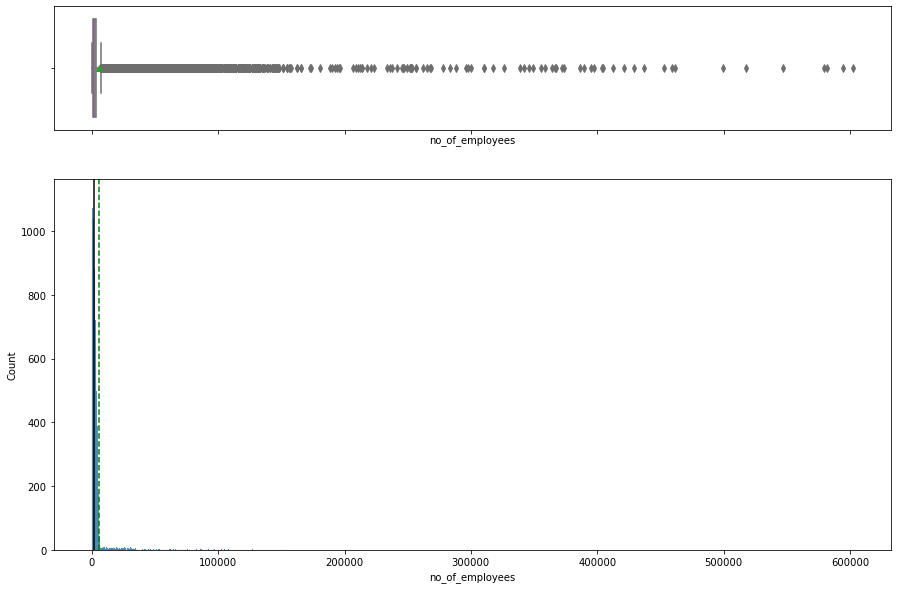

<IPython.core.display.Javascript object>

In [26]:
# Histogram boxplot for number of employees
histogram_boxplot(df, "no_of_employees")

* The distribution of the number of employees is right skewed

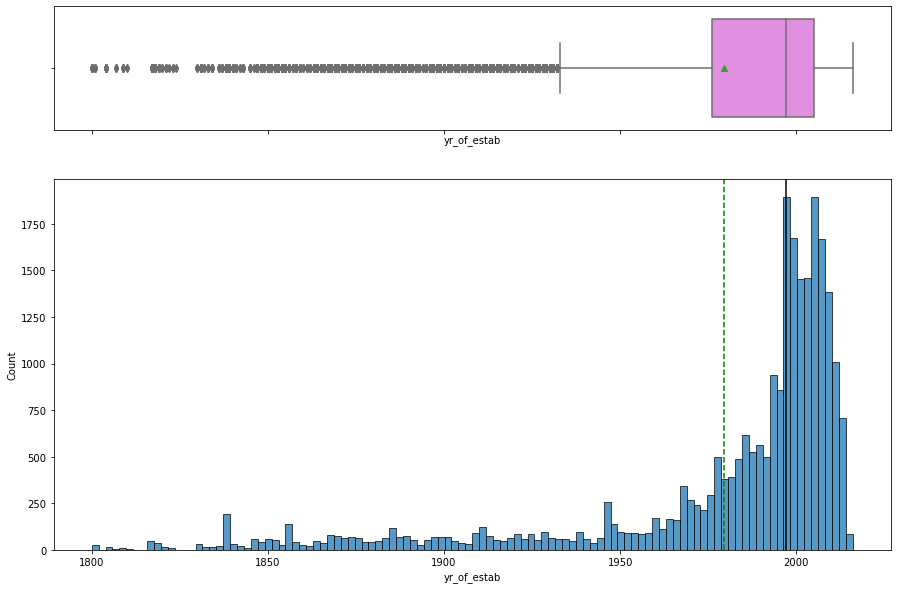

<IPython.core.display.Javascript object>

In [27]:
# Histogram boxplot for the year of establishment
histogram_boxplot(df, "yr_of_estab")

* The distribution of year of company's establishment is left skewed. 
* About half (50%) of the organisations in the dataset were established before 1997 and the oter half after 1997.

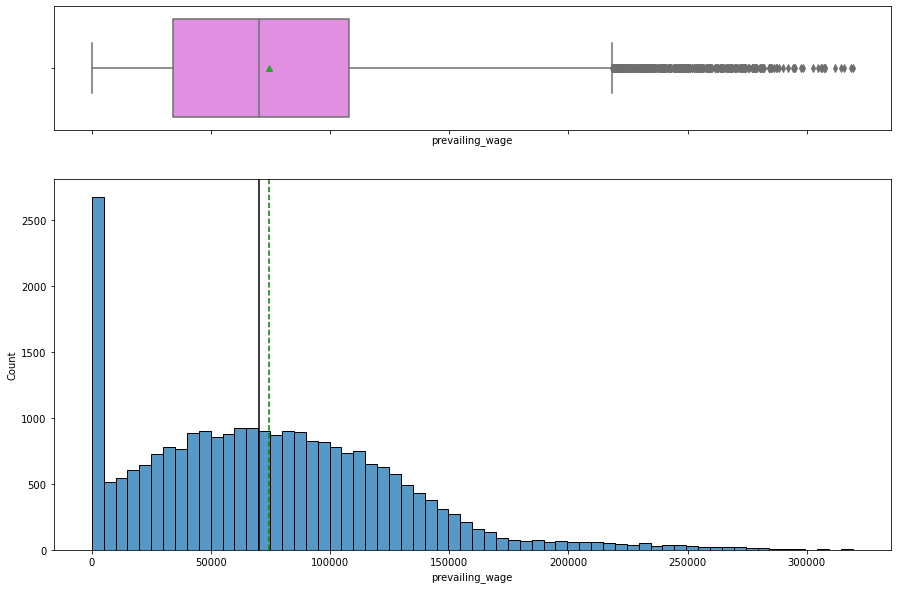

<IPython.core.display.Javascript object>

In [28]:
# Histogram boxplot for the prevailing wage
histogram_boxplot(df, "prevailing_wage")

* The distribution of the prevailing wage is almost normal but with many outliers
* The low salaries calls for further investigation and we shall proceed to do this taking the unit_of_wage into consideration.

In [29]:
# Statistical summary of the dataset with respect to the prevailing_wage and unit_of_wage
df.groupby("unit_of_wage").prevailing_wage.describe().T

unit_of_wage,Hour,Month,Week,Year
count,2153.000000,89.000000,272.000000,22933.000000
mean,414.773882,87592.864045,85606.820515,81237.541122
std,275.052214,59525.124924,44802.704810,49959.089955
min,2.136700,1599.280000,2183.230000,100.000000
25%,152.700300,44986.240000,51408.277500,43741.960000
50%,373.204500,81826.010000,85075.820000,76172.830000
75%,637.311100,121629.600000,111331.910000,111341.970000
max,999.919500,264362.950000,280175.950000,319210.270000


<IPython.core.display.Javascript object>

#### Observations
* The unit_of_wage classified as Month and Week appear to be a misclassification.
* We can observe that the mean and median values of the "Week", "Month" and "Year" columns are very similar
* We shall therefore treat those two columns as if they are yearly salaries in the Data preprocessing section
* The minimum salary under the year column is 100. This looks like an abberation and an indication that the dataset is not clean.
* We could convert the hourly wages into annual salaries but this will be difficult since we dont know the number of hours the employee worked for, therefore we will not take any further action on the dataset apart from the one mentioned above.

In [30]:
df_Yearly_wage_grp = df[(df["unit_of_wage"] == "Year")]

<IPython.core.display.Javascript object>

In [31]:
df_Yearly_wage_grp.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.65,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.86,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.03,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.39,Year,Y,Certified
5,Asia,Master's,Y,N,2339,2012,South,78252.14,Year,Y,Certified


<IPython.core.display.Javascript object>

In [32]:
df_Yearly_wage_grp["prevailing_wage"].describe()

count     22933.000000
mean      81237.541122
std       49959.089955
min         100.000000
25%       43741.960000
50%       76172.830000
75%      111341.970000
max      319210.270000
Name: prevailing_wage, dtype: float64

<IPython.core.display.Javascript object>

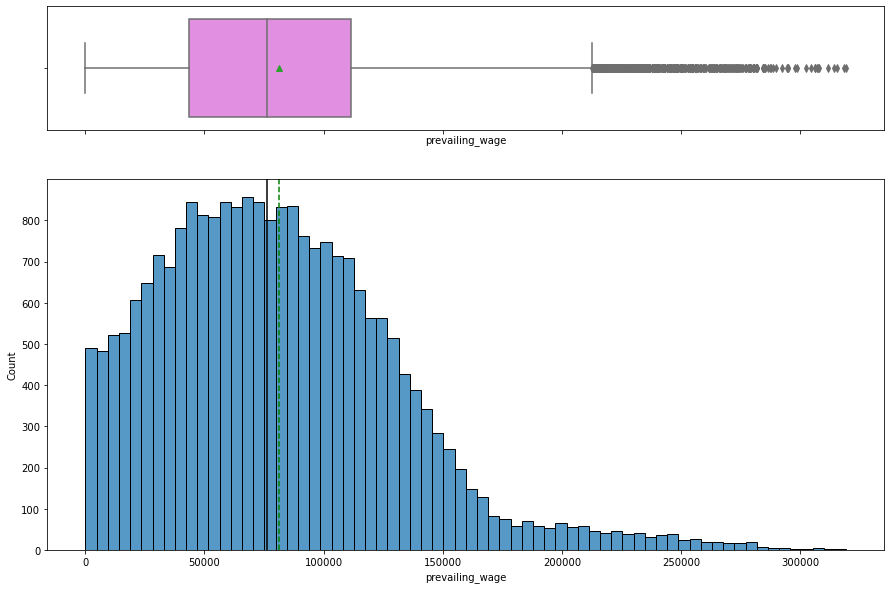

<IPython.core.display.Javascript object>

In [33]:
# Histogram boxplot for the prevailing wage per Hour
histogram_boxplot(df_Yearly_wage_grp, "prevailing_wage")

* Yearly wage is slightly right skewed with the mean and median at 81000 and 76000 respectively

In [34]:
df_Monthly_wage_grp = df[(df["unit_of_wage"] == "Month")]

<IPython.core.display.Javascript object>

In [35]:
df_Monthly_wage_grp["prevailing_wage"].describe()

count        89.000000
mean      87592.864045
std       59525.124924
min        1599.280000
25%       44986.240000
50%       81826.010000
75%      121629.600000
max      264362.950000
Name: prevailing_wage, dtype: float64

<IPython.core.display.Javascript object>

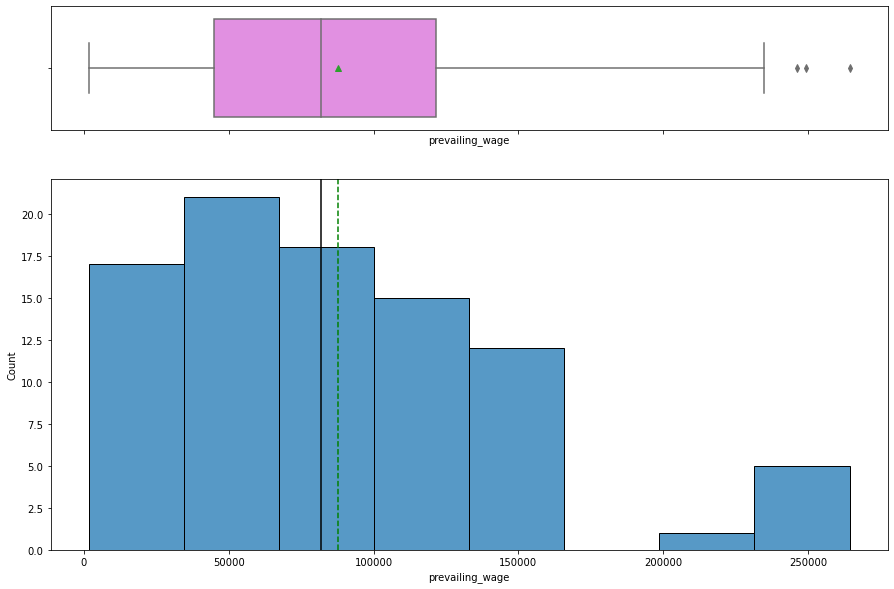

<IPython.core.display.Javascript object>

In [36]:
# Histogram boxplot for the prevailing wage per Hour
histogram_boxplot(df_Monthly_wage_grp, "prevailing_wage")

* The mean and median are 88000 and 82000 for the monthly prevailing_wage

In [37]:
df_Weekly_wage_grp = df[(df["unit_of_wage"] == "Week")]

<IPython.core.display.Javascript object>

In [38]:
df_Weekly_wage_grp["prevailing_wage"].describe()

count       272.000000
mean      85606.820515
std       44802.704810
min        2183.230000
25%       51408.277500
50%       85075.820000
75%      111331.910000
max      280175.950000
Name: prevailing_wage, dtype: float64

<IPython.core.display.Javascript object>

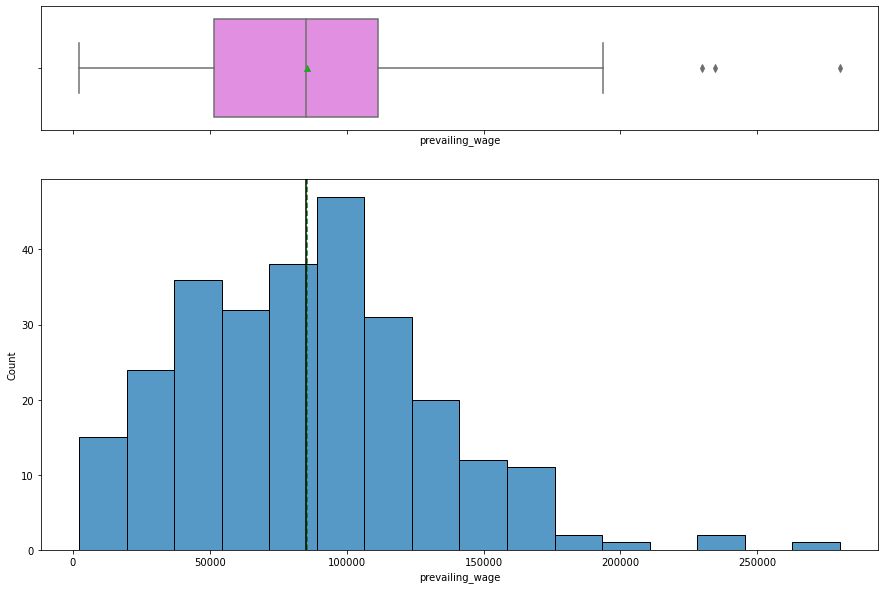

<IPython.core.display.Javascript object>

In [39]:
# Histogram boxplot for the prevailing wage per Hour
histogram_boxplot(df_Weekly_wage_grp, "prevailing_wage")

* The distribution of the weekly wage is also normal (slightly right skewed) with the mean and median being approximately 86000 and 85000 respectively

In [40]:
df_Hourly_wage_grp = df[(df["unit_of_wage"] == "Hour")]

<IPython.core.display.Javascript object>

In [41]:
df_Hourly_wage_grp["prevailing_wage"].describe()

count    2153.000000
mean      414.773882
std       275.052214
min         2.136700
25%       152.700300
50%       373.204500
75%       637.311100
max       999.919500
Name: prevailing_wage, dtype: float64

<IPython.core.display.Javascript object>

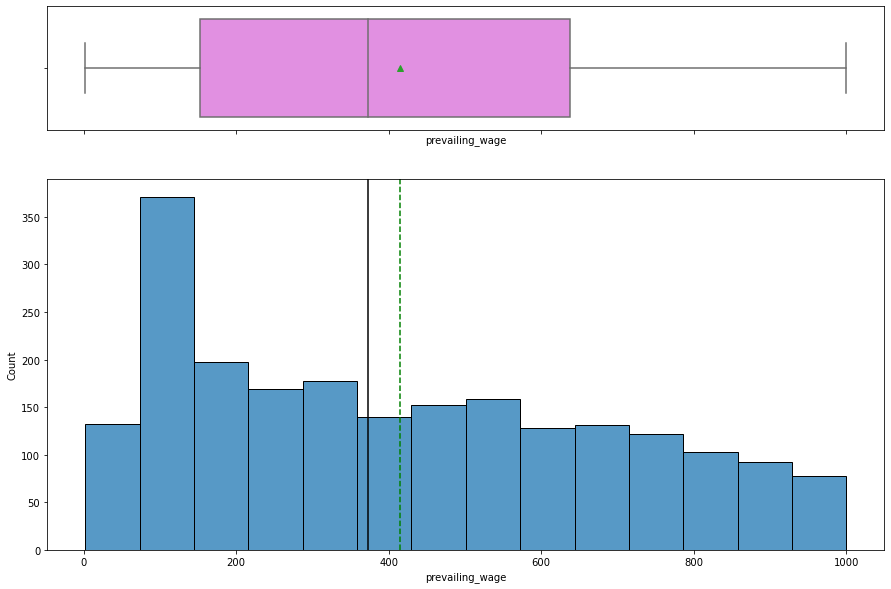

<IPython.core.display.Javascript object>

In [42]:
# Histogram boxplot for the prevailing wage per year
histogram_boxplot(df_Hourly_wage_grp, "prevailing_wage")

* The mean and median for the hourly wage is approximately 415 and 373 respectively

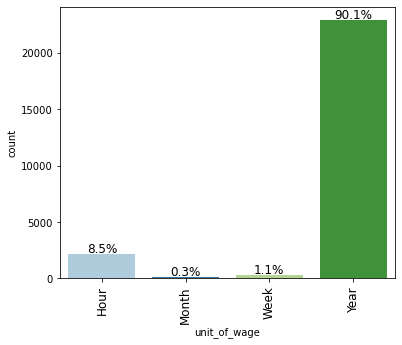

<IPython.core.display.Javascript object>

In [43]:
labeled_barplot(df, "unit_of_wage", perc=True)

* About 90% of the employees are on annual salaries, 8.5% are on hourly wages, and about 1.4% are on monthly and weekly wages.

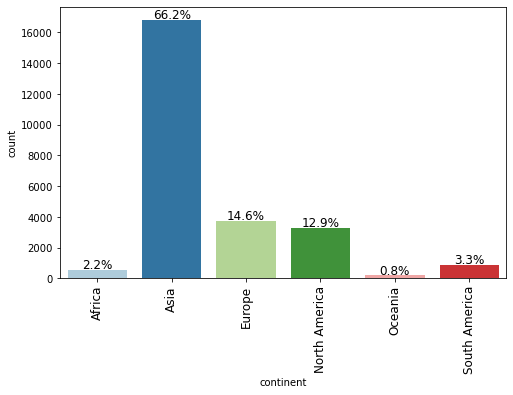

<IPython.core.display.Javascript object>

In [44]:
labeled_barplot(df, "continent", perc=True)

* About 66% of the employees came from asia, while 14.6% and 12.9% came from europe and North America respectively. The remaining (about 6.3%) came from South America, Africa and Oceania.

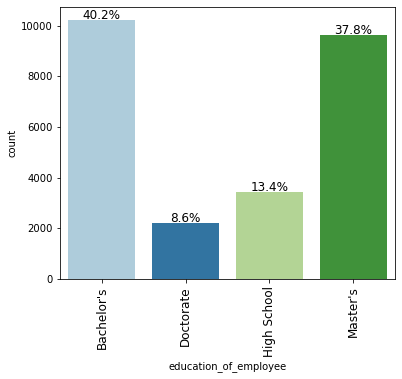

<IPython.core.display.Javascript object>

In [45]:
labeled_barplot(df, "education_of_employee", perc=True)

* More than 75% of the employees have a Masters (37.8%) or a Bachelor's (40.2%) degree. 8.6 has Doctororate degrees while the remaining 13.4% are High school graduates

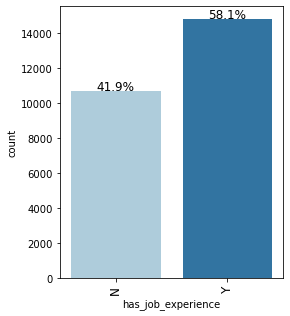

<IPython.core.display.Javascript object>

In [46]:
labeled_barplot(df, "has_job_experience", perc=True)

* About 58% of the employees have prior work experience while the rest has no experience whatsoever.

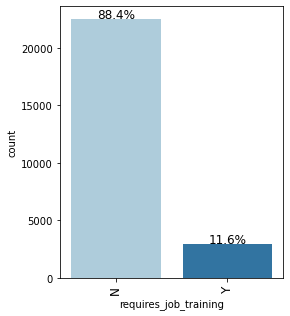

<IPython.core.display.Javascript object>

In [47]:
labeled_barplot(df, "requires_job_training", perc=True)

* 88.4% of the employees do not require job training wheras 11.6% require job training.

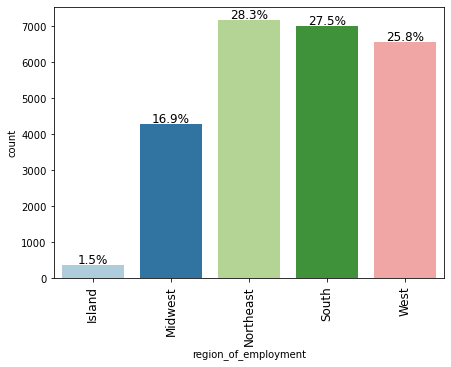

<IPython.core.display.Javascript object>

In [48]:
labeled_barplot(df, "region_of_employment", perc=True)

* Over 80% of the employees are in the Northeast (28.3%), South (27.5%) and West (25.8%) regions while the Midwest region caters for 16.9% of the employees . The Island region caters for a paltry 1.5%

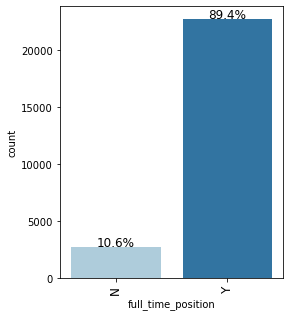

<IPython.core.display.Javascript object>

In [49]:
labeled_barplot(df, "full_time_position", perc=True)

* 89.4% of the employees are in full time positions while 10.6% are part time.

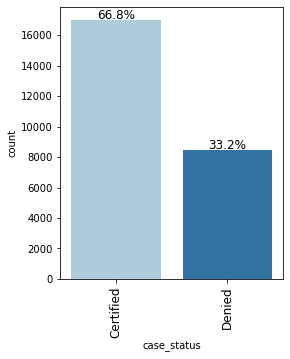

<IPython.core.display.Javascript object>

In [50]:
labeled_barplot(df, "case_status", perc=True)

* 66.8% of visa applications are certified while 33.2% are denied.

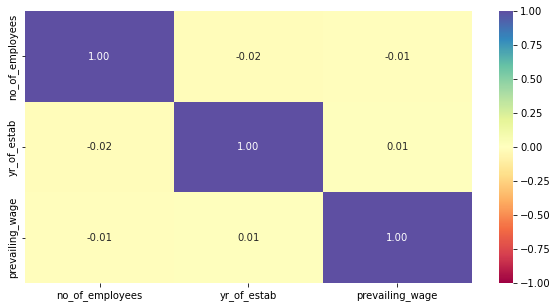

<IPython.core.display.Javascript object>

In [51]:
plt.figure(figsize=(10, 5))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

* There is no correlation between the numerical variables

In [52]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

In [53]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

<IPython.core.display.Javascript object>

case_status            Certified  Denied    All
education_of_employee                          
All                        17001    8446  25447
Bachelor's                  6362    3858  10220
High School                 1164    2252   3416
Master's                    7565    2057   9622
Doctorate                   1910     279   2189
------------------------------------------------------------------------------------------------------------------------


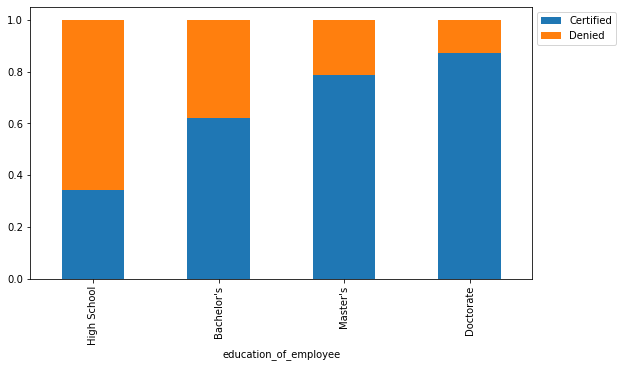

<IPython.core.display.Javascript object>

In [54]:
stacked_barplot(df, "education_of_employee", "case_status")

### Question 1 
#### Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification? 

* Yes education plays a role in Visa certification.
* High School graduates have the lowest visa approval rate of about 34% whereas candidates with Doctorate degrees have an 87% visa approval rate, followed by those with Masters and bachelor's degrees with approval rates of 78% and 62% respectively.

case_status    Certified  Denied    All
continent                              
All                17001    8446  25447
Asia               11001    5839  16840
North America       2037    1250   3287
Europe              2953     774   3727
South America        492     359    851
Africa               396     154    550
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


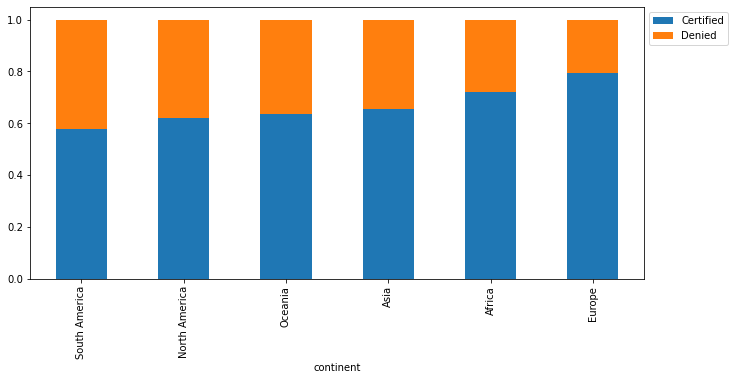

<IPython.core.display.Javascript object>

In [55]:
stacked_barplot(df, "continent", "case_status")

### Question 2
#### How does the visa status vary across different continents? 

* Europe has the lowest visa rejection rate of about 20% and almost 80% approval rate
* Africa has an approval rate of about 72 % and a rejection rate of 28%
* South America has the highest rejection rate of 42% and the lowest approval rate of 58%

case_status         Certified  Denied    All
has_job_experience                          
All                     17001    8446  25447
N                        5986    4675  10661
Y                       11015    3771  14786
------------------------------------------------------------------------------------------------------------------------


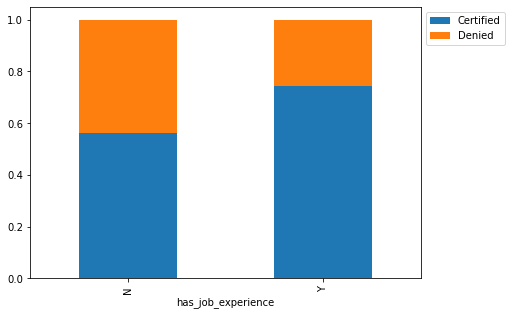

<IPython.core.display.Javascript object>

In [56]:
stacked_barplot(df, "has_job_experience", "case_status")

### Question 3
#### Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status? 

* Yes, Applicants with prior job experience have a higher probability of their visa application being approved (almost 75%) than aplicants with no prior job experience (56%)

case_status   Certified  Denied    All
unit_of_wage                          
All               17001    8446  25447
Year              16030    6903  22933
Hour                747    1406   2153
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


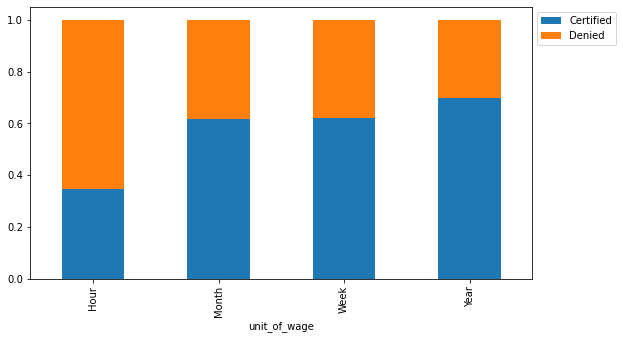

<IPython.core.display.Javascript object>

In [57]:
stacked_barplot(df, "unit_of_wage", "case_status")

### Question 4
#### In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa? 

* Applicants with prevailing_wage unit specified in "Hours" has the lowest visa approval rate of 35% wheras applicants with unit_of_wage specified in "Years" have an average approval rate of about 70%, "Months" and "Weeks" have approval rates of about 62%

case_status            Certified  Denied    All
requires_job_training                          
All                        17001    8446  25447
N                          15000    7498  22498
Y                           2001     948   2949
------------------------------------------------------------------------------------------------------------------------


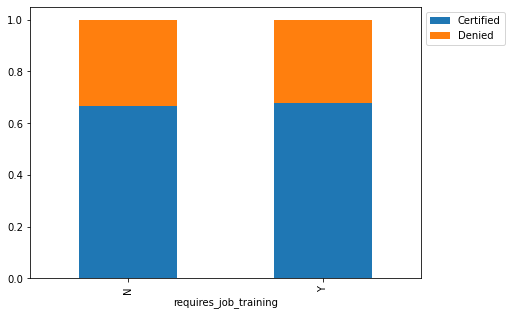

<IPython.core.display.Javascript object>

In [58]:
stacked_barplot(df, "requires_job_training", "case_status")

* There is almost no difference in the approval or rejection rate for applicants requiring job training and those that dont.

case_status           Certified  Denied    All
region_of_employment                          
All                       17001    8446  25447
Northeast                  4524    2665   7189
West                       4097    2481   6578
South                      4908    2098   7006
Midwest                    3246    1053   4299
Island                      226     149    375
------------------------------------------------------------------------------------------------------------------------


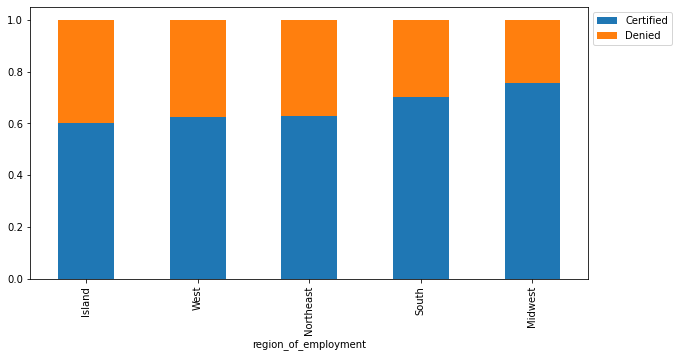

<IPython.core.display.Javascript object>

In [59]:
stacked_barplot(df, "region_of_employment", "case_status")

* Approval rates for applicants wishing to work in the midwest region is the highest (about 76%), followed by those heading to to the South region (70%). The Island region have the lowest approval rate (60%)

case_status         Certified  Denied    All
full_time_position                          
All                     17001    8446  25447
Y                       15146    7595  22741
N                        1855     851   2706
------------------------------------------------------------------------------------------------------------------------


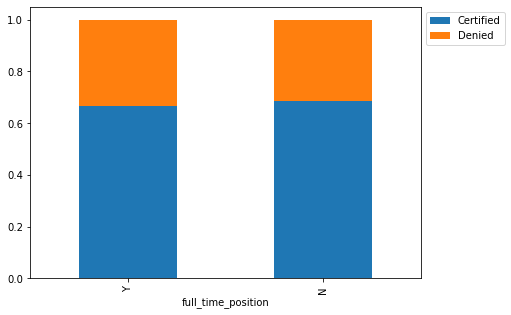

<IPython.core.display.Javascript object>

In [60]:
stacked_barplot(df, "full_time_position", "case_status")

* Visa approval rates for applicants taking up either Full-time or part_time positions are almost the same, 66.6% and 68.5% respectively.

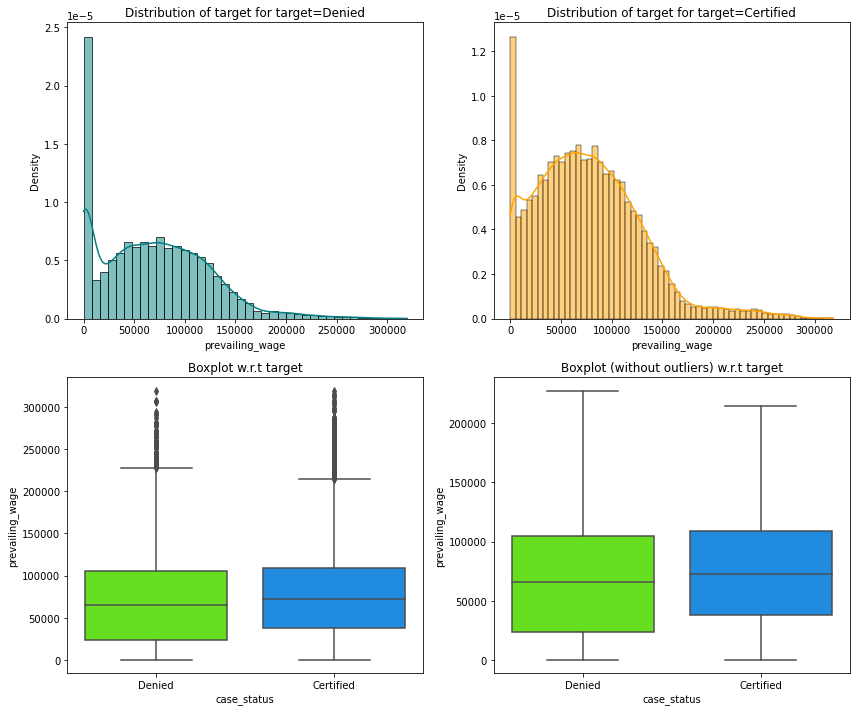

<IPython.core.display.Javascript object>

In [61]:
## Complete the code to find distribution of prevailing wage and case status
distribution_plot_wrt_target(df, "prevailing_wage", "case_status")

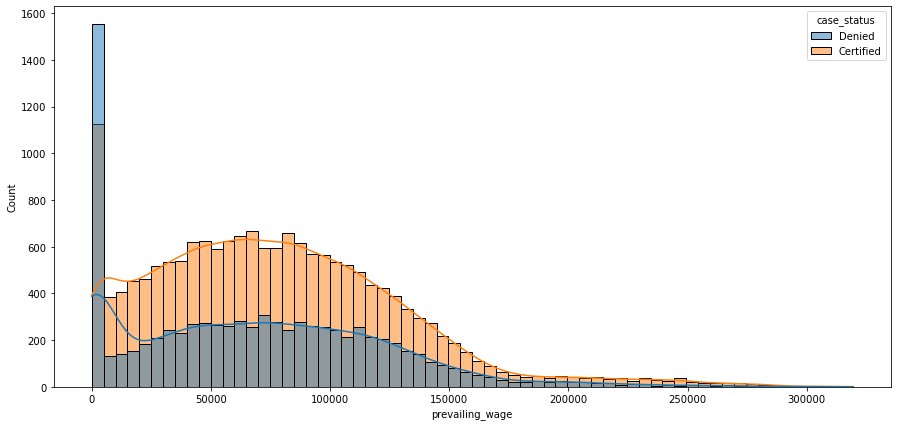

<IPython.core.display.Javascript object>

In [62]:
plt.figure(figsize=(15, 7))
sns.histplot(df, x="prevailing_wage", hue="case_status", kde=True)
plt.show()

In [63]:
df.prevailing_wage.mean()

74468.2814794872

<IPython.core.display.Javascript object>

In [64]:
df.prevailing_wage.median()

70312.5

<IPython.core.display.Javascript object>

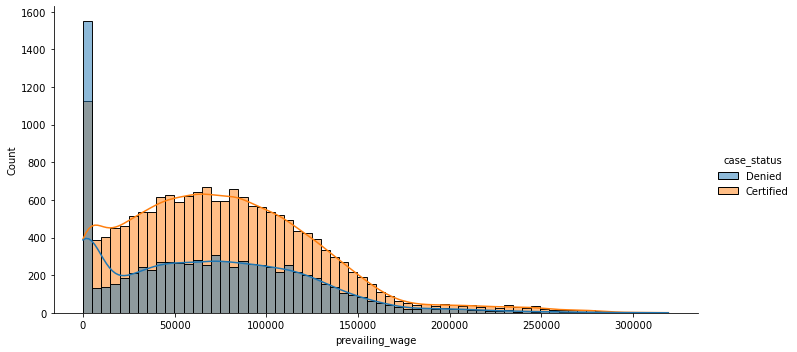

<IPython.core.display.Javascript object>

In [65]:
sns.displot(df, x="prevailing_wage", hue="case_status", kde=True, height=5, aspect=2)

### Question 5
#### The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

* The distribution of the prevailing wage with respect to the case status is almost normal for both certified and denied applications.
* We can observe that applications with higher prevailing wages has a better chance of being certified than those with lower prevailing wages as prevailing wage increases towards the mean/median point and the difference becomes less and less significant as prevailing wage increases further away from the median point.

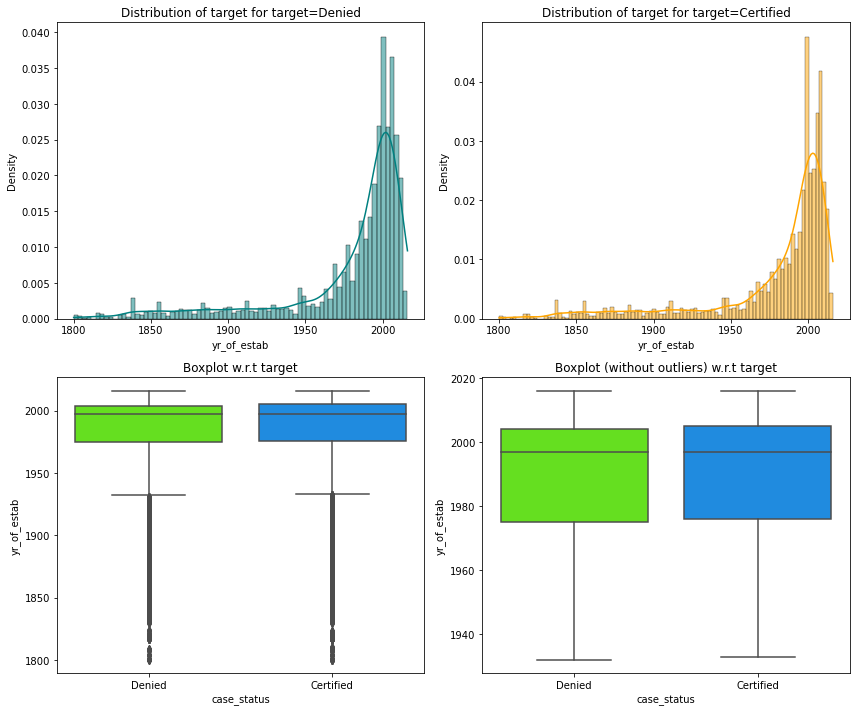

<IPython.core.display.Javascript object>

In [66]:
## Complete the code to find distribution of year of establishment and case status
distribution_plot_wrt_target(df, "yr_of_estab", "case_status")

#### Observations

* The distribution of the year of establishment for both certified and denied applicants is left skewed and there is no significant difference between the two distributions. 
* From the boxplots, we can see that the year of establishment has no significant effect on the case status of the visa application.

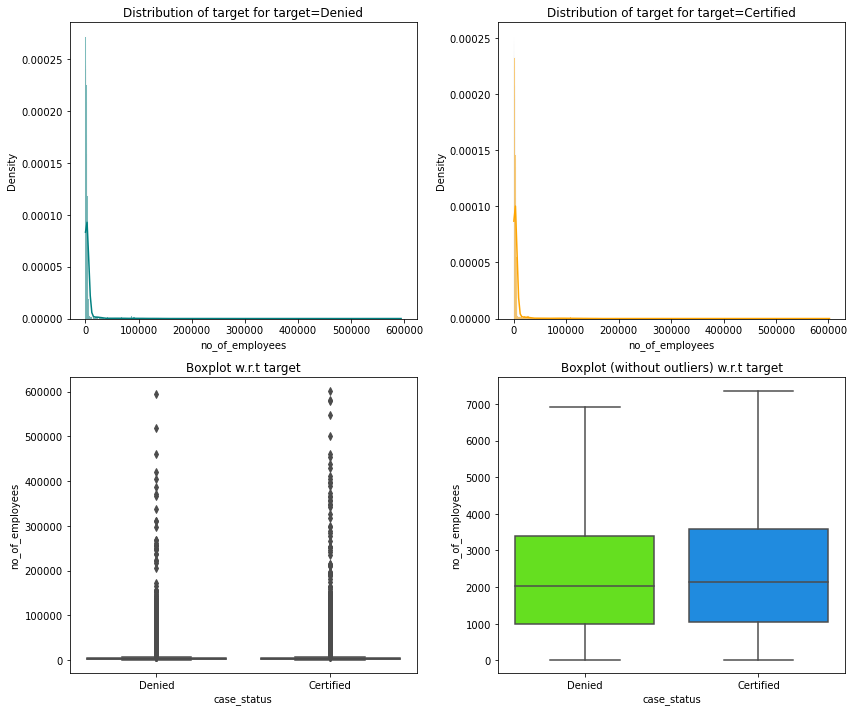

<IPython.core.display.Javascript object>

In [67]:
## Complete the code to find distribution of Number of employees and case status
distribution_plot_wrt_target(df, "no_of_employees", "case_status")

#### Observations

* There is no significant difference between the distributions of the number of employees for the applicants whose applications were denied and those approved, and we can also see from the boxplots that employee population has an insignificant effect on whether an applicants visa application is certified or denied. 

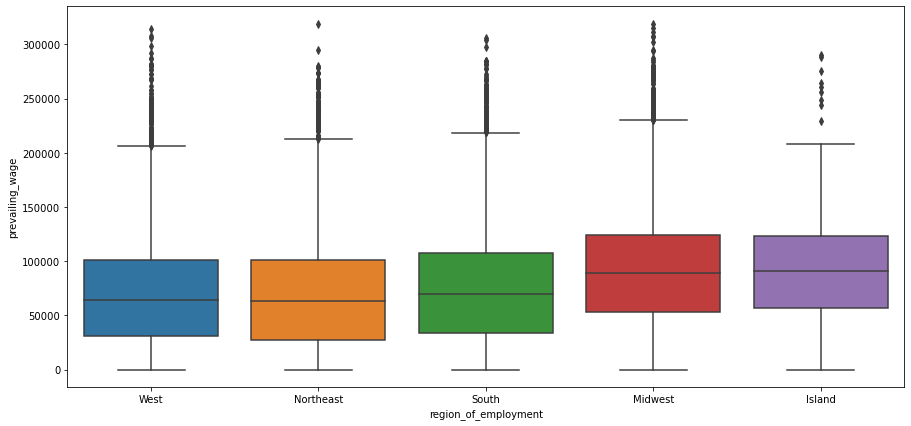

<IPython.core.display.Javascript object>

In [68]:
# boxplot for region of employment and prevailing wage
plt.figure(figsize=(15, 7))
sns.boxplot(data=df, x="region_of_employment", y="prevailing_wage")
plt.show()

In [69]:
df.groupby("region_of_employment")["prevailing_wage"].median()

region_of_employment
Island       90678.170
Midwest      89153.910
Northeast    63276.740
South        70192.665
West         64358.440
Name: prevailing_wage, dtype: float64

<IPython.core.display.Javascript object>

In [70]:
df.groupby("region_of_employment")["prevailing_wage"].mean()

region_of_employment
Island       91712.750760
Midwest      91691.666673
Northeast    67886.113189
South        74064.955159
West         69852.122027
Name: prevailing_wage, dtype: float64

<IPython.core.display.Javascript object>

#### Observation
* Prevailing wage is highest in the island region followed by the Midwest region. It is lowest in the Northeast region. 

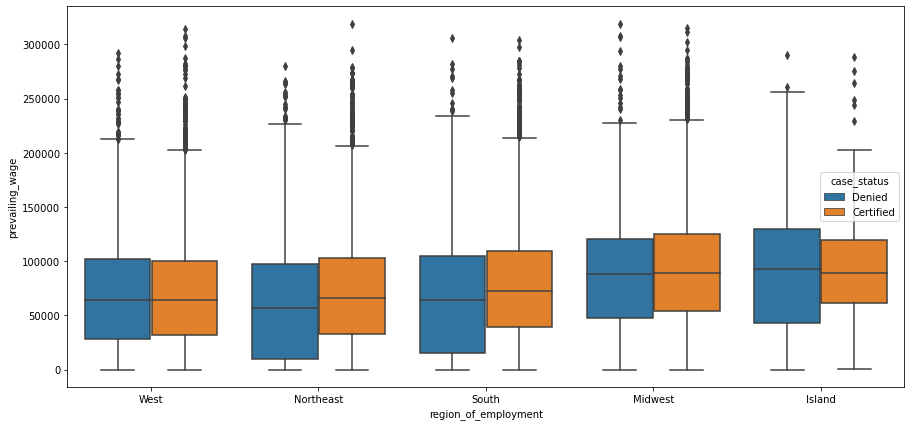

<IPython.core.display.Javascript object>

In [71]:
# boxplot for region of employment and prevailing wage
plt.figure(figsize=(15, 7))
sns.boxplot(data=df, x="region_of_employment", y="prevailing_wage", hue="case_status")
plt.show()

#### Observation
* There is a better chance of an applicants visa application being certified in the Northeast and South region if the prevailing rate is high, wheras the opposite is the case in the Island region. The difference in chances of certification with respect to the prevailing wage is insignificant in the West and Midwest region.

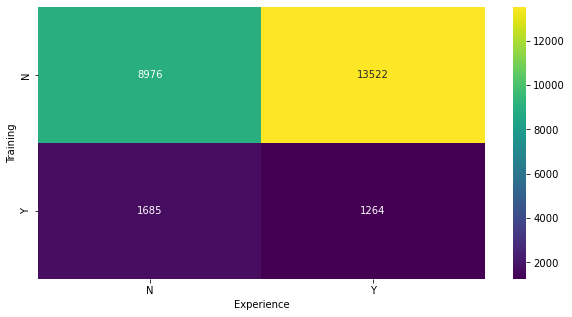

<IPython.core.display.Javascript object>

In [72]:
## Complete the code to plot heatmap for the crosstab between education and region of employment
plt.figure(figsize=(10, 5))
sns.heatmap(
    pd.crosstab(df.requires_job_training, df.has_job_experience),
    annot=True,
    fmt="g",
    cmap="viridis",
)

plt.ylabel("Training")
plt.xlabel("Experience")
plt.show()

In [73]:
df.groupby("has_job_experience")["requires_job_training"].value_counts(normalize=True)

has_job_experience  requires_job_training
N                   N                        0.841947
                    Y                        0.158053
Y                   N                        0.914514
                    Y                        0.085486
Name: requires_job_training, dtype: float64

<IPython.core.display.Javascript object>

#### Observation
* A higher percentage of applicants with no prior job experience requires job training -16%, compared with those with prior job experience - 8.5%

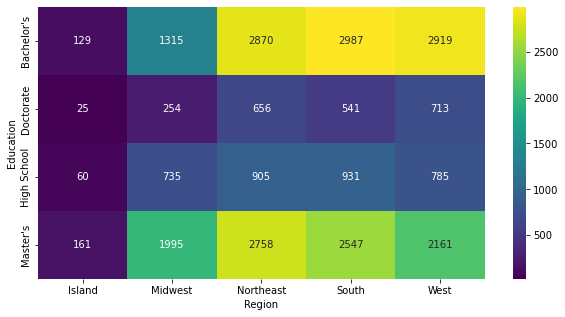

<IPython.core.display.Javascript object>

In [74]:
## Complete the code to plot heatmap for the crosstab between education and region of employment
plt.figure(figsize=(10, 5))
sns.heatmap(
    pd.crosstab(df["education_of_employee"], df["region_of_employment"]),
    annot=True,
    fmt="g",
    cmap="viridis",
)

plt.ylabel("Education")
plt.xlabel("Region")
plt.show()

In [75]:
df.groupby("region_of_employment")["education_of_employee"].value_counts(normalize=True)

region_of_employment  education_of_employee
Island                Master's                 0.429333
                      Bachelor's               0.344000
                      High School              0.160000
                      Doctorate                0.066667
Midwest               Master's                 0.464061
                      Bachelor's               0.305885
                      High School              0.170970
                      Doctorate                0.059084
Northeast             Bachelor's               0.399221
                      Master's                 0.383642
                      High School              0.125887
                      Doctorate                0.091251
South                 Bachelor's               0.426349
                      Master's                 0.363546
                      High School              0.132886
                      Doctorate                0.077220
West                  Bachelor's               0.443752
    

<IPython.core.display.Javascript object>

#### Observation
* A greater percentage of applications received by companies in the Island and Midwest region comes from Masters degree holders, 43% and 46% of total applications received in these regions respectively. This is followed by Bachelor's degree holders, 34% and 30% of total applications received for these regions respectively.

* The reverse is the case for the Northeast, South and West region with total applications received from bachelor's degree holders standing at 40%, 43% and 44% respectively, followed by applications from Master's degree holders standing at 38%, 36% and 33% respectivelt.

* High school graduates and Doctorate degree holders bring up the rear in that order in all the regions.



## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering 
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

In [76]:
df["unit_of_wage"] = df["unit_of_wage"].apply(
    lambda x: "Hour" if x == "Hour" else "Year"
)

<IPython.core.display.Javascript object>

In [77]:
df.unit_of_wage.value_counts()

Year    23294
Hour     2153
Name: unit_of_wage, dtype: int64

<IPython.core.display.Javascript object>

In [78]:
num_columns = df.select_dtypes(include=np.number).columns.tolist()

<IPython.core.display.Javascript object>

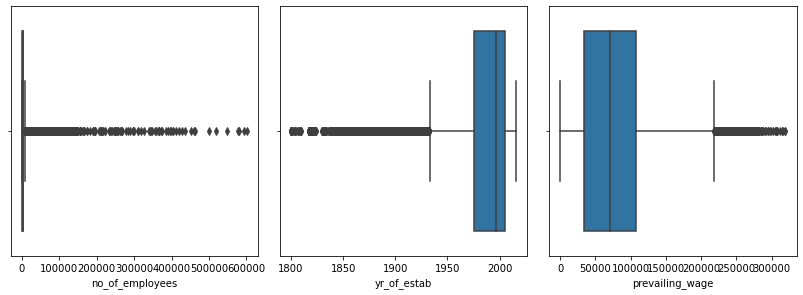

<IPython.core.display.Javascript object>

In [79]:
# outlier detection using boxplot
plt.figure(figsize=(15, 20))

for j, column in enumerate(num_columns):
    plt.subplot(5, 4, j + 1)
    sns.boxplot(data=df, x=column)
    plt.tight_layout()
plt.show()

### Observations
There are outliers in all the columns plotted but since these outliers are actually real values and dropping them is bound to lead to loss of important information, I choose to leave them as they are.

In [80]:
df["case_status"] = df["case_status"].apply(lambda x: 1 if x == "Certified" else 0)

<IPython.core.display.Javascript object>

In [81]:
df["has_job_experience"] = df["has_job_experience"].apply(
    lambda x: 1 if x == "Y" else 0
)

<IPython.core.display.Javascript object>

In [82]:
df["requires_job_training"] = df["requires_job_training"].apply(
    lambda x: 1 if x == "Y" else 0
)

<IPython.core.display.Javascript object>

In [83]:
df["full_time_position"] = df["full_time_position"].apply(
    lambda x: 1 if x == "Y" else 0
)

<IPython.core.display.Javascript object>

In [84]:
df.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,0,0,14513,2007,West,592.2029,Hour,1,0
1,Asia,Master's,1,0,2412,2002,Northeast,83425.6500,Year,1,1
2,Asia,Bachelor's,0,1,44444,2008,West,122996.8600,Year,1,0
3,Asia,Bachelor's,0,0,98,1897,West,83434.0300,Year,1,0
4,Africa,Master's,1,0,1082,2005,South,149907.3900,Year,1,1


<IPython.core.display.Javascript object>

In [85]:
# Identifying the categorical variables
cat_columns = df.select_dtypes(include=["object"]).columns.tolist()
cat_columns

['continent', 'education_of_employee', 'region_of_employment', 'unit_of_wage']

<IPython.core.display.Javascript object>

In [86]:
X = df.drop(["case_status"], axis=1)
Y = df["case_status"]

<IPython.core.display.Javascript object>

In [87]:
# create dummies for the categorical variables in X
X = pd.get_dummies(X, cat_columns, drop_first=False)
X.head()

,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,prevailing_wage,full_time_position,continent_Africa,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,education_of_employee_Bachelor's,education_of_employee_Doctorate,education_of_employee_High School,education_of_employee_Master's,region_of_employment_Island,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West,unit_of_wage_Hour,unit_of_wage_Year
0,0,0,14513,2007,592.2029,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0
1,1,0,2412,2002,83425.6500,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1
2,0,1,44444,2008,122996.8600,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1
3,0,0,98,1897,83434.0300,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1
4,1,0,1082,2005,149907.3900,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1


<IPython.core.display.Javascript object>

* drop_first = False - This is to allow me choose which of the encoded dummy variables to drop. Choice made is to drop the least important as per the EDA

In [88]:
X = X.drop(["continent_South America"], axis=1)

<IPython.core.display.Javascript object>

In [89]:
X = X.drop(["education_of_employee_High School"], axis=1)

<IPython.core.display.Javascript object>

In [90]:
X = X.drop(["region_of_employment_Island"], axis=1)

<IPython.core.display.Javascript object>

In [91]:
X = X.drop(["unit_of_wage_Hour"], axis=1)

<IPython.core.display.Javascript object>

In [92]:
X.head()

,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,prevailing_wage,full_time_position,continent_Africa,continent_Asia,continent_Europe,continent_North America,continent_Oceania,education_of_employee_Bachelor's,education_of_employee_Doctorate,education_of_employee_Master's,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West,unit_of_wage_Year
0,0,0,14513,2007,592.2029,1,0,1,0,0,0,0,0,0,0,0,0,1,0
1,1,0,2412,2002,83425.6500,1,0,1,0,0,0,0,0,1,0,1,0,0,1
2,0,1,44444,2008,122996.8600,1,0,1,0,0,0,1,0,0,0,0,0,1,1
3,0,0,98,1897,83434.0300,1,0,1,0,0,0,1,0,0,0,0,0,1,1
4,1,0,1082,2005,149907.3900,1,1,0,0,0,0,0,0,1,0,0,1,0,1


<IPython.core.display.Javascript object>

In [93]:
X.shape

(25447, 19)

<IPython.core.display.Javascript object>

In [94]:
# Splitting data into train and test sets in the ratio 70:30
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.3, random_state=1, stratify=Y
)

<IPython.core.display.Javascript object>

In [95]:
# Shape of Training set
X_train.shape

(17812, 19)

<IPython.core.display.Javascript object>

In [96]:
# Shape of test set
X_test.shape

(7635, 19)

<IPython.core.display.Javascript object>

In [97]:
y_train.value_counts(normalize=True)

1    0.668089
0    0.331911
Name: case_status, dtype: float64

<IPython.core.display.Javascript object>

In [98]:
y_test.value_counts(normalize=True)

1    0.668107
0    0.331893
Name: case_status, dtype: float64

<IPython.core.display.Javascript object>

## EDA

- It is a good idea to explore the data once again after manipulating it.

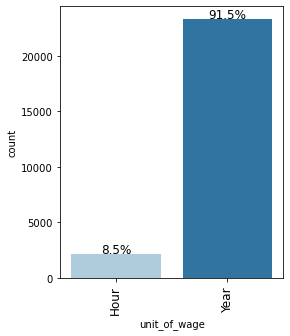

<IPython.core.display.Javascript object>

In [99]:
labeled_barplot(df, "unit_of_wage", perc=True)

case_status      0      1    All
unit_of_wage                    
All           8446  17001  25447
Year          7040  16254  23294
Hour          1406    747   2153
------------------------------------------------------------------------------------------------------------------------


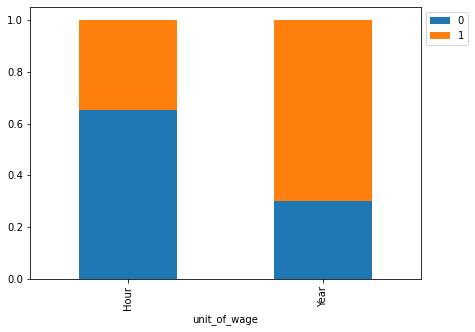

<IPython.core.display.Javascript object>

In [100]:
stacked_barplot(df, "unit_of_wage", "case_status")

In [101]:
# Statistical summary of the dataset with respect to the prevailing_wage and unit_of_wage
df.groupby("unit_of_wage")["prevailing_wage"].describe().T


unit_of_wage,Hour,Year
count,2153.000000,23294.000000
mean,414.773882,81312.842390
std,275.052214,49943.366126
min,2.136700,100.000000
25%,152.700300,43860.932500
50%,373.204500,76257.680000
75%,637.311100,111414.447500
max,999.919500,319210.270000


<IPython.core.display.Javascript object>

## Building bagging and boosting models

### Model building and evaluation criteria

1. Models can make right predictions by predicting that:
    * A Visa application should be certified and the application is actually certified (True Positive)
    * A Visa application should be denied and that application is actually denied (True Negative)


2. Models can also make wrong predictions by predicting that:
    * A Visa application should be certified but that application is actually denied (False positive)
    * A Visa application should be denied but the application is actually certified (False negative)
   
In the case at hand, we want to minimise false positives and false negatives as much as posible, because:
* a) If our model predicts that an application should be certified and the application is denied, this is a waste of resources on the part of OFLC and this would at the same time prevent a qualified applicant from receiving a work Visa for a position that he is suited for. 
* b) If our model predicts that an application should be denied and the application is actually certified, these will lead to an unqualified candidate being employed for a position that he is not suitable to fill, and this could lead to all sorts of administrative problems and it could also deny US nationals placement into a position that they could comfortably fit into. 


For the two reasons above, we will choose the F1 score as our metric of performance measurement. Maximising the F1 score will minimise both false positives and false negatives.

#### We proceed by creating functions to calculate the different metrics and the confusion matrix 

In [102]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [103]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("Actual Case_Status")
    plt.xlabel("Predicted Case_Status")

<IPython.core.display.Javascript object>

## Bagging - Model Building and Hyperparameter Tuning

### Building the Decision Tree Model

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


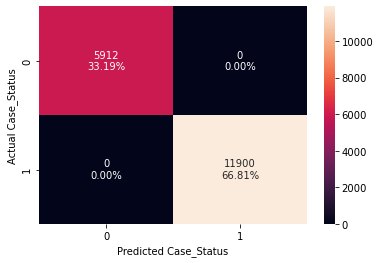

<IPython.core.display.Javascript object>

In [104]:
# Fitting the model
d_tree = DecisionTreeClassifier(random_state=1)
d_tree.fit(X_train, y_train)

# Calculating different metrics for the train dataset
d_tree_model_train_perf = model_performance_classification_sklearn(
    d_tree, X_train, y_train
)
print("Training performance:\n", d_tree_model_train_perf)

# Creating confusion matrix for the train dataset
confusion_matrix_sklearn(d_tree, X_train, y_train)

Testing performance:
    Accuracy    Recall  Precision        F1
0  0.653438  0.732013   0.744863  0.738382


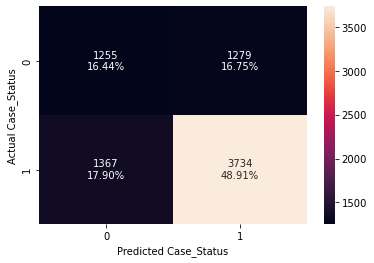

<IPython.core.display.Javascript object>

In [105]:
# Calculating different metrics for the test dataset
d_tree_model_test_perf = model_performance_classification_sklearn(
    d_tree, X_test, y_test
)
print("Testing performance:\n", d_tree_model_test_perf)

# Creating confusion matrix for the test dataset
confusion_matrix_sklearn(d_tree, X_test, y_test)

* The decision tree is overfitting the training data.
* We shall try to improve the model's performance by using hyperparameter tuning.

### Hyperparameter Tuning of Decision Tree model

In [106]:
# Choose the type of classifier with which the tuning is done.
dtree_estimator = DecisionTreeClassifier(
    class_weight={0: 0.67, 1: 0.33}, random_state=1
)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(2, 30),
    "min_samples_leaf": [1, 2, 5, 7, 10],
    "max_leaf_nodes": [2, 3, 5, 10, 15],
    "min_impurity_decrease": [0.0001, 0.001, 0.01, 0.1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer, n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.67, 1: 0.33}, max_depth=7,
                       max_leaf_nodes=10, min_impurity_decrease=0.0001,
                       random_state=1)

<IPython.core.display.Javascript object>

Training performance:
    Accuracy    Recall  Precision        F1
0   0.73821  0.831429   0.788304  0.809292


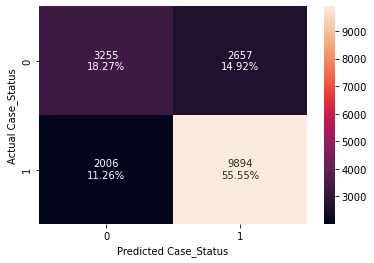

<IPython.core.display.Javascript object>

In [107]:
# Calculating different metrics for the train dataset
dtree_estimator_model_train_perf = model_performance_classification_sklearn(
    dtree_estimator, X_train, y_train
)
print("Training performance:\n", dtree_estimator_model_train_perf)

# Creating confusion matrix for the train dataset
confusion_matrix_sklearn(dtree_estimator, X_train, y_train)

Testing performance:
    Accuracy   Recall  Precision        F1
0  0.735691  0.82376   0.789701  0.806371


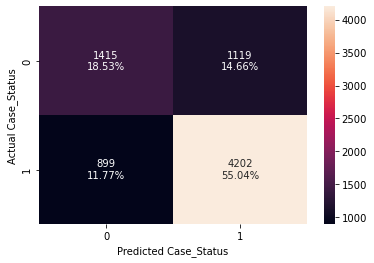

<IPython.core.display.Javascript object>

In [108]:
# Calculating different metrics for the test dataset
dtree_estimator_model_test_perf = model_performance_classification_sklearn(
    dtree_estimator, X_test, y_test
)
print("Testing performance:\n", dtree_estimator_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(dtree_estimator, X_test, y_test)

#### Observations
* The tuned decision tree model is not overfitting the dataset anymore.
* The overall performance is better than that of the default decision Tree model
* F1 Score, which is our metric of importance has improved from 0.738 to 0.806
* The F1 score for both training and test dataset is 0.809 and 0.806 respectively.

In [109]:
column_names = list(X.columns)
feature_names = column_names
print(feature_names)

['has_job_experience', 'requires_job_training', 'no_of_employees', 'yr_of_estab', 'prevailing_wage', 'full_time_position', 'continent_Africa', 'continent_Asia', 'continent_Europe', 'continent_North America', 'continent_Oceania', "education_of_employee_Bachelor's", 'education_of_employee_Doctorate', "education_of_employee_Master's", 'region_of_employment_Midwest', 'region_of_employment_Northeast', 'region_of_employment_South', 'region_of_employment_West', 'unit_of_wage_Year']


<IPython.core.display.Javascript object>

In [110]:
# Printing the Gini importance of the predictor variables
print(
    pd.DataFrame(
        dtree_estimator.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                       Imp
has_job_experience                0.244254
education_of_employee_Master's    0.216137
education_of_employee_Doctorate   0.204023
education_of_employee_Bachelor's  0.149622
unit_of_wage_Year                 0.130188
continent_Europe                  0.032093
region_of_employment_Midwest      0.023683
full_time_position                0.000000
continent_Africa                  0.000000
continent_Asia                    0.000000
requires_job_training             0.000000
continent_Oceania                 0.000000
prevailing_wage                   0.000000
yr_of_estab                       0.000000
no_of_employees                   0.000000
region_of_employment_Northeast    0.000000
region_of_employment_South        0.000000
region_of_employment_West         0.000000
continent_North America           0.000000


<IPython.core.display.Javascript object>

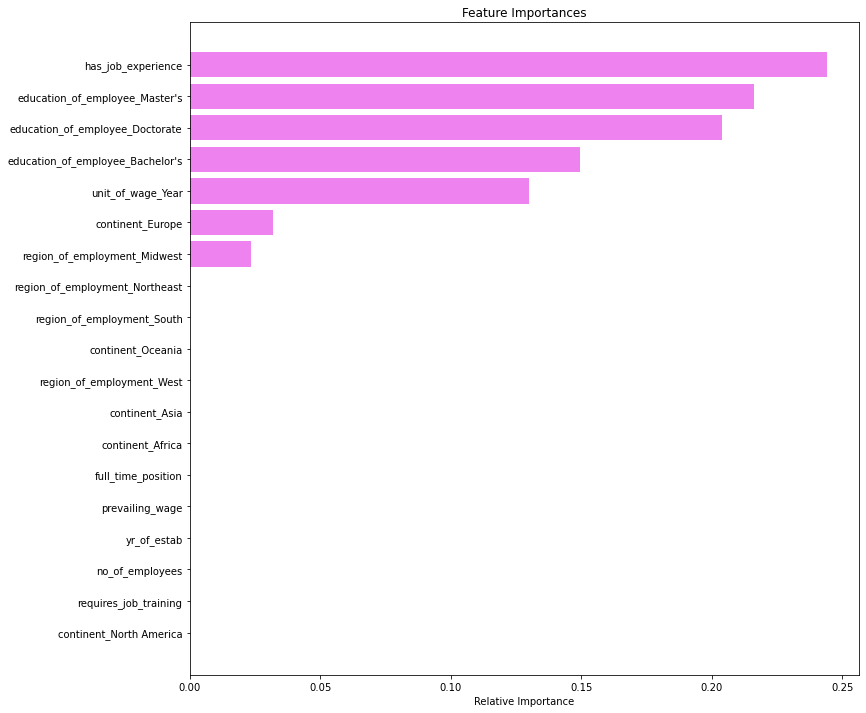

<IPython.core.display.Javascript object>

In [111]:
# level of importance of the predictor variables
importances = dtree_estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Building the Bagging Classifier Model

Training performance:
    Accuracy    Recall  Precision        F1
0  0.984393  0.984874   0.991708  0.988279


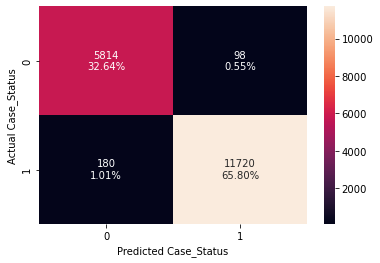

<IPython.core.display.Javascript object>

In [112]:
# Fitting the model
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train, y_train)

# Calculating different metrics for the train dataset
bagging_classifier_model_train_perf = model_performance_classification_sklearn(
    bagging_classifier, X_train, y_train
)
print("Training performance:\n", bagging_classifier_model_train_perf)

# Creating confusion matrix for the train dataset
confusion_matrix_sklearn(bagging_classifier, X_train, y_train)

Testing performance:
    Accuracy    Recall  Precision        F1
0  0.694695  0.770633   0.771995  0.771314


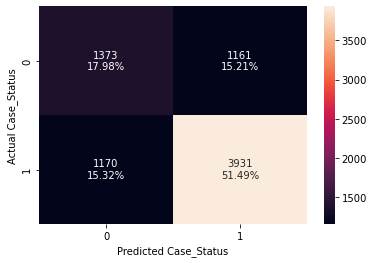

<IPython.core.display.Javascript object>

In [113]:
# Calculating different metrics for the test dataset
bagging_classifier_model_test_perf = model_performance_classification_sklearn(
    bagging_classifier, X_test, y_test
)
print("Testing performance:\n", bagging_classifier_model_test_perf)

# Creating confusion matrix for the test dataset
confusion_matrix_sklearn(bagging_classifier, X_test, y_test)

* Bagging classifier is also overfitting on the training data
* We shall try to improve the model's performance by using hyperparameter tuning.

### Hyperparameter Tuning of Bagging Classifier model

In [114]:
# Choose the type of classifier with which the tuning is done.
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_samples": [0.7, 0.8, 0.9, 1],
    "max_features": [0.7, 0.8, 0.9, 1],
    "n_estimators": [10, 20, 30, 40, 50],
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.8, max_samples=0.7, n_estimators=50,
                  random_state=1)

<IPython.core.display.Javascript object>

Training performance:
    Accuracy    Recall  Precision       F1
0  0.992365  0.998487   0.990167  0.99431


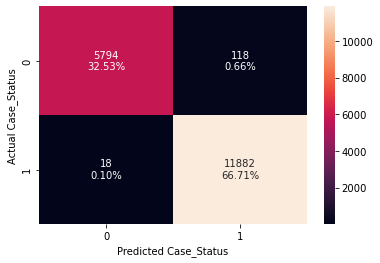

<IPython.core.display.Javascript object>

In [115]:
# Calculating different metrics for the train dataset
bagging_estimator_tuned_model_train_perf = model_performance_classification_sklearn(
    bagging_estimator_tuned, X_train, y_train
)
print("Training performance:\n", bagging_estimator_tuned_model_train_perf)

# Creating confusion matrix for the train dataset
confusion_matrix_sklearn(bagging_estimator_tuned, X_train, y_train)

Testing performance:
    Accuracy    Recall  Precision        F1
0  0.725475  0.878847   0.752055  0.810523


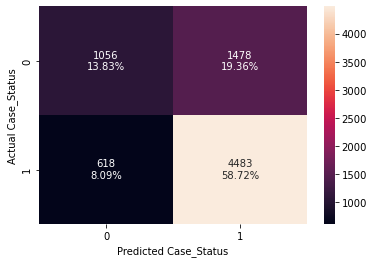

<IPython.core.display.Javascript object>

In [116]:
# Calculating different metrics for the test dataset
bagging_estimator_tuned_model_test_perf = model_performance_classification_sklearn(
    bagging_estimator_tuned, X_test, y_test
)
print("Testing performance:\n", bagging_estimator_tuned_model_test_perf)

# Creating confusion matrix for the test dataset
confusion_matrix_sklearn(bagging_estimator_tuned, X_test, y_test)

#### Observation
* The F1 score has improved from 0.771 to 0.811 after the hyperparameter tuning, but the model is still overfitting the training data.
* we shall proceed to try other models

### Building the Random Forest Classifier

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


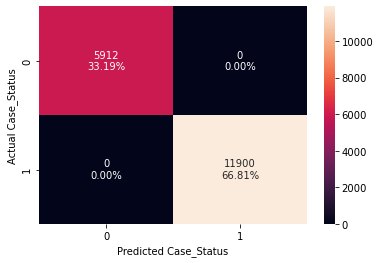

<IPython.core.display.Javascript object>

In [117]:
# Fitting the model
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train, y_train)

# Calculating different metrics for the train dataset
rf_estimator_model_train_perf = model_performance_classification_sklearn(
    rf_estimator, X_train, y_train
)
print("Training performance:\n", rf_estimator_model_train_perf)

# Creating confusion matrix for the train dataset
confusion_matrix_sklearn(rf_estimator, X_train, y_train)

Testing performance:
    Accuracy   Recall  Precision        F1
0  0.716699  0.83219   0.764589  0.796959


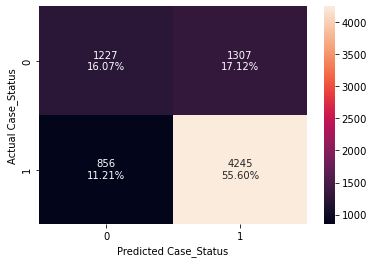

<IPython.core.display.Javascript object>

In [118]:
# Calculating different metrics for the test dataset
rf_estimator_model_test_perf = model_performance_classification_sklearn(
    rf_estimator, X_test, y_test
)
print("Testing performance:\n", rf_estimator_model_test_perf)

# Creating confusion matrix for the test dataset
confusion_matrix_sklearn(rf_estimator, X_test, y_test)

* The Random forest classifier is also overfitting on the training data
* We shall try to improve the model's performance by using hyperparameter tuning

### Hyperparameter Tuning of the Random forest model

In [119]:
# Choose the type of classifier with which the tuning is done.
rf_tuned = RandomForestClassifier(
    class_weight={0: 0.67, 1: 0.33}, random_state=1, oob_score=True, bootstrap=True
)

parameters = {
    "max_depth": list(np.arange(5, 30, 5)) + [None],
    "max_features": ["sqrt", "log2", None],
    "min_samples_leaf": np.arange(1, 15, 5),
    "min_samples_split": np.arange(2, 20, 5),
    "n_estimators": np.arange(10, 110, 10),
}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer, cv=5, n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.67, 1: 0.33}, max_depth=25,
                       max_features='sqrt', n_estimators=90, oob_score=True,
                       random_state=1)

<IPython.core.display.Javascript object>

Training performance:
    Accuracy    Recall  Precision        F1
0  0.998372  0.999244   0.998321  0.998782


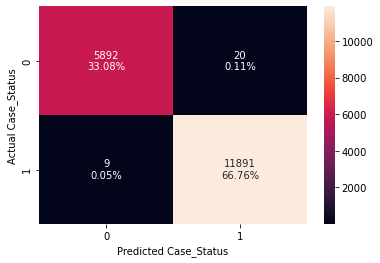

<IPython.core.display.Javascript object>

In [120]:
# Calculating different metrics for the train dataset
rf_tuned_model_train_perf = model_performance_classification_sklearn(
    rf_tuned, X_train, y_train
)
print("Training performance:\n", rf_tuned_model_train_perf)

# Creating confusion matrix for the train dataset
confusion_matrix_sklearn(rf_tuned, X_train, y_train)

Testing performance:
    Accuracy    Recall  Precision      F1
0  0.719712  0.835915   0.765942  0.7994


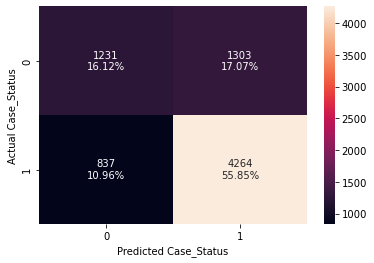

<IPython.core.display.Javascript object>

In [121]:
# Calculating different metrics for the test dataset
rf_tuned_model_test_perf = model_performance_classification_sklearn(
    rf_tuned, X_test, y_test
)
print("Testing performance:\n", rf_tuned_model_test_perf)

# Creating confusion matrix for the test dataset
confusion_matrix_sklearn(rf_tuned, X_test, y_test)

#### Observation
* There is no noticeable improvement with the F1 score on the hyperparameter tuned Random Forest model. It inreased just slightly from 0.797 to 0.799
* The model is still overfitting the training dataset
* Will proceed to try other models.

## Boosting - Model Building and Hyperparameter Tuning

### Building the AdaBoost Classifier Model

Training performance:
    Accuracy    Recall  Precision        F1
0  0.737368  0.889664   0.758816  0.819047


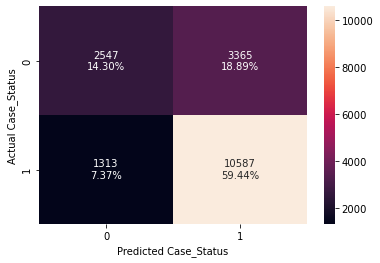

<IPython.core.display.Javascript object>

In [122]:
# Fitting the model
ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train, y_train)

# Calculating different metrics for the train dataset
ab_classifier_model_train_perf = model_performance_classification_sklearn(
    ab_classifier, X_train, y_train
)
print("Training performance:\n", ab_classifier_model_train_perf)

# Creating confusion matrix for the train dataset
confusion_matrix_sklearn(ab_classifier, X_train, y_train)

Testing performance:
    Accuracy   Recall  Precision        F1
0  0.733988  0.88022   0.759729  0.815548


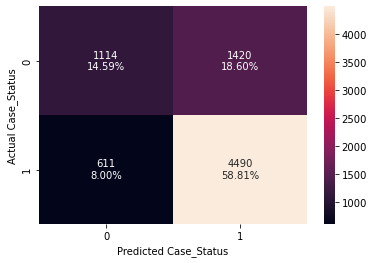

<IPython.core.display.Javascript object>

In [123]:
# Calculating different metrics for the test dataset
ab_classifier_model_test_perf = model_performance_classification_sklearn(
    ab_classifier, X_test, y_test
)
print("Testing performance:\n", ab_classifier_model_test_perf)

# Creating confusion matrix for the test dataset
confusion_matrix_sklearn(ab_classifier, X_test, y_test)

* The performance metrics of the Adaboost model for both training and testing data are very close and the model is not overfitting the dataset. 
* F1-score on the test data is 0.816 and this is very close to the F1_score on the training data which is 0.819
* Nevertheless, we'll see if we can improve the model further by tuning it.

### Hyperparameter Tuning of the Adaboost model

In [124]:
# Choose the type of classifier with which the tuning is done.
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    # Let's try different max_depth for base_estimator
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1),
        DecisionTreeClassifier(max_depth=2),
        DecisionTreeClassifier(max_depth=3),
    ],
    "n_estimators": np.arange(10, 110, 10),
    "learning_rate": np.arange(0.1, 2, 0.1),
}

# Type of scoring used to compare parameter  combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                   learning_rate=0.4, n_estimators=30, random_state=1)

<IPython.core.display.Javascript object>

Training performance:
    Accuracy   Recall  Precision        F1
0  0.743038  0.89042   0.764006  0.822383


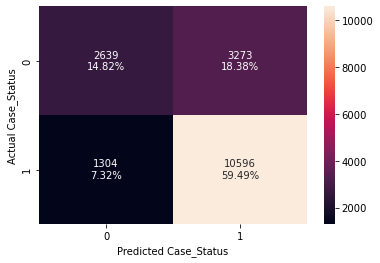

<IPython.core.display.Javascript object>

In [125]:
# Calculating different metrics for the train dataset
abc_tuned_model_train_perf = model_performance_classification_sklearn(
    abc_tuned, X_train, y_train
)
print("Training performance:\n", abc_tuned_model_train_perf)

# Creating confusion matrix for the train dataset
confusion_matrix_sklearn(abc_tuned, X_train, y_train)

Testing performance:
    Accuracy    Recall  Precision       F1
0  0.740537  0.882376   0.765216  0.81963


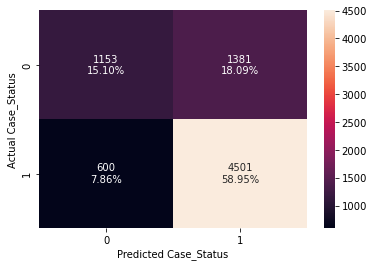

<IPython.core.display.Javascript object>

In [126]:
# Calculating different metrics for the test dataset
abc_tuned_model_test_perf = model_performance_classification_sklearn(
    abc_tuned, X_test, y_test
)
print("Testing performance:\n", abc_tuned_model_test_perf)

# Creating confusion matrix for the test dataset
confusion_matrix_sklearn(abc_tuned, X_test, y_test)

#### Observation
* The tuned Adaboost model is not overfitting the dataset
* The overall performance is almost the same as that of the default Adaboost model
* F1 Score, which is our metric of importance has improved (very slightly) from 0.8155 to 0.8196
* The F1 score for both training and test dataset is very close and stands at 0.8224 and 0.8196 respectively.

In [127]:
# Printing the Gini importance of the predictor variables
print(
    pd.DataFrame(
        abc_tuned.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                       Imp
education_of_employee_Master's    0.170373
education_of_employee_Doctorate   0.149763
prevailing_wage                   0.106685
education_of_employee_Bachelor's  0.103638
has_job_experience                0.088575
no_of_employees                   0.077938
region_of_employment_Midwest      0.055151
region_of_employment_South        0.048274
continent_Europe                  0.047738
unit_of_wage_Year                 0.036409
continent_North America           0.032732
region_of_employment_West         0.023352
full_time_position                0.021039
requires_job_training             0.014754
yr_of_estab                       0.013557
continent_Africa                  0.010024
continent_Oceania                 0.000000
continent_Asia                    0.000000
region_of_employment_Northeast    0.000000


<IPython.core.display.Javascript object>

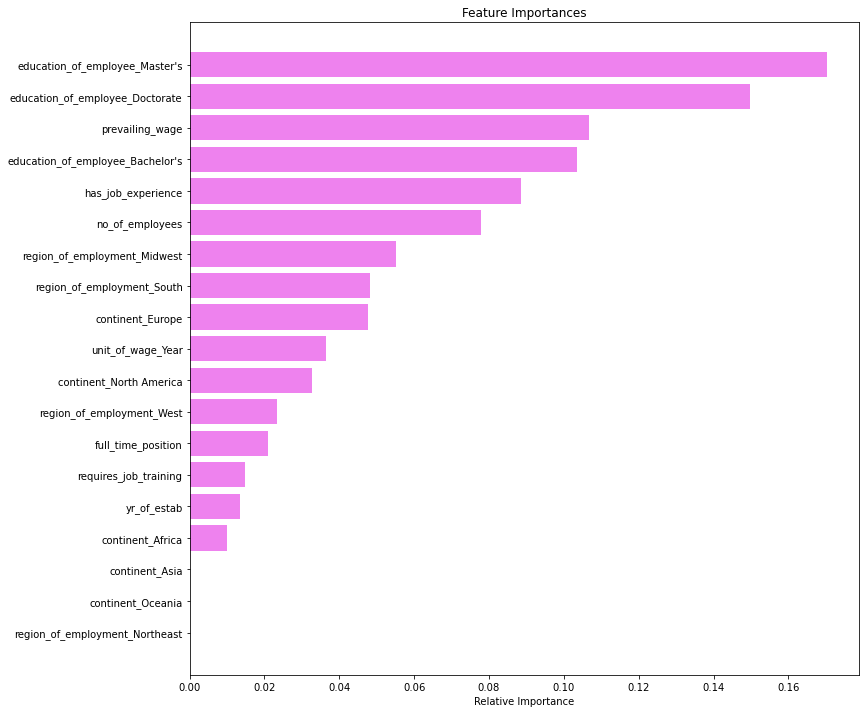

<IPython.core.display.Javascript object>

In [128]:
# level of importance of the predictor variables
importances = abc_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Building the Gradient Boost Model

Training performance:
    Accuracy    Recall  Precision        F1
0  0.752414  0.868403   0.784186  0.824149


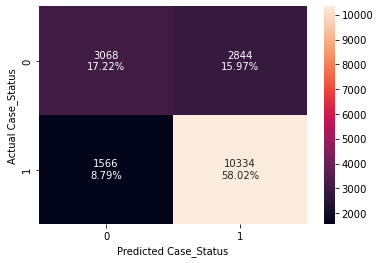

<IPython.core.display.Javascript object>

In [129]:
# Fitting the model
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train, y_train)

# Calculating different metrics for the train dataset
gb_classifier_model_train_perf = model_performance_classification_sklearn(
    gb_classifier, X_train, y_train
)
print("Training performance:\n", gb_classifier_model_train_perf)

# Creating confusion matrix for the train dataset
confusion_matrix_sklearn(gb_classifier, X_train, y_train)

Testing performance:
    Accuracy    Recall  Precision        F1
0  0.744597  0.857087   0.781691  0.817655


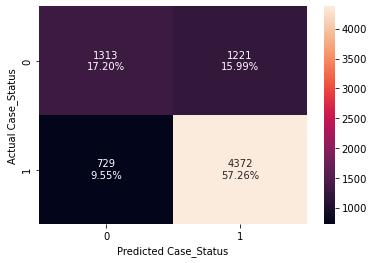

<IPython.core.display.Javascript object>

In [130]:
# Calculating different metrics for the test dataset
gb_classifier_model_test_perf = model_performance_classification_sklearn(
    gb_classifier, X_test, y_test
)
print("Testing performance:\n", gb_classifier_model_test_perf)

# Creating confusion matrix for the test dataset
confusion_matrix_sklearn(gb_classifier, X_test, y_test)

* The performance metrics of the Gradient boost model for both training and testing data are very close and the model is not overfitting the dataset.
* F1-score for the test data (0.8177) is very close to that of the training data (0.8241).
* Nevertheless, we'll see if we can improve the model further by tuning it.

In [131]:
# Printing the Gini importance of the predictor variables
print(
    pd.DataFrame(
        gb_classifier.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                       Imp
education_of_employee_Doctorate   0.206243
education_of_employee_Master's    0.174033
has_job_experience                0.152743
unit_of_wage_Year                 0.123145
education_of_employee_Bachelor's  0.080336
prevailing_wage                   0.065576
continent_Europe                  0.061250
region_of_employment_Midwest      0.035763
region_of_employment_South        0.021365
no_of_employees                   0.020429
region_of_employment_West         0.016197
continent_North America           0.011042
yr_of_estab                       0.009333
region_of_employment_Northeast    0.008632
full_time_position                0.005987
requires_job_training             0.005475
continent_Asia                    0.001498
continent_Africa                  0.000953
continent_Oceania                 0.000000


<IPython.core.display.Javascript object>

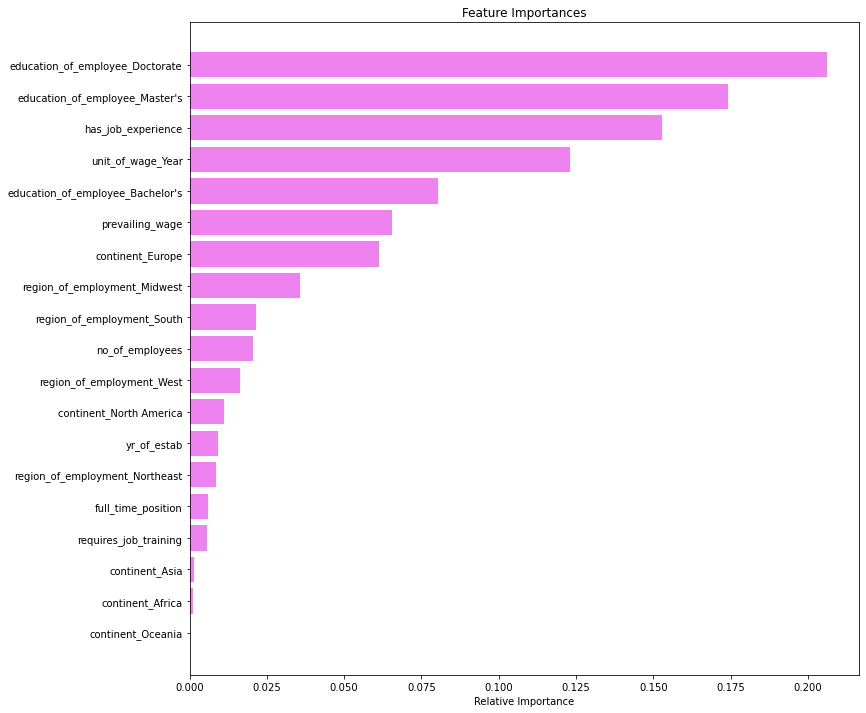

<IPython.core.display.Javascript object>

In [132]:
# level of importance of the predictor variables
importances = gb_classifier.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Hyperparameter Tuning of the Gradient Boost model

In [133]:
# Choose the type of classifier.
gbc_tuned = GradientBoostingClassifier(
    init=AdaBoostClassifier(random_state=1), random_state=1
)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [100, 150, 200, 250],
    "subsample": [0.8, 0.9, 1],
    "max_features": [0.7, 0.8, 0.9, 1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.7, random_state=1, subsample=1)

<IPython.core.display.Javascript object>

Training performance:
    Accuracy  Recall  Precision        F1
0  0.752133    0.87   0.783072  0.824251


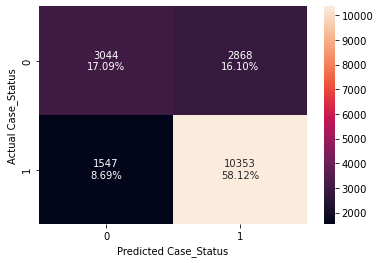

<IPython.core.display.Javascript object>

In [134]:
# Calculating different metrics for the train dataset
gbc_tuned_model_train_perf = model_performance_classification_sklearn(
    gbc_tuned, X_train, y_train
)
print("Training performance:\n", gbc_tuned_model_train_perf)

# Creating confusion matrix for the train dataset
confusion_matrix_sklearn(gbc_tuned, X_train, y_train)

Testing performance:
    Accuracy  Recall  Precision        F1
0  0.746693  0.8614   0.781711  0.819623


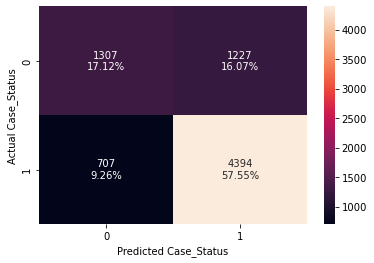

<IPython.core.display.Javascript object>

In [135]:
# Calculating different metrics for the test dataset
gbc_tuned_model_test_perf = model_performance_classification_sklearn(
    gbc_tuned, X_test, y_test
)
print("Testing performance:\n", gbc_tuned_model_test_perf)

# Creating confusion matrix for the test dataset
confusion_matrix_sklearn(gbc_tuned, X_test, y_test)

###### Observation
* The hyperparameter tuned Gradient boost model did not overfit the dataset
* The performance of the tuned gradient boost model is slightly better than that of the default model. It improves from 0.8177 to 0.8196
* we shall therefore try another model.

In [136]:
# Printing the Gini importance of the predictor variables
print(
    pd.DataFrame(
        gbc_tuned.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                       Imp
education_of_employee_Master's    0.194957
has_job_experience                0.152303
education_of_employee_Bachelor's  0.138724
education_of_employee_Doctorate   0.133009
prevailing_wage                   0.109440
unit_of_wage_Year                 0.076475
continent_Europe                  0.055125
region_of_employment_Midwest      0.037326
region_of_employment_West         0.021456
region_of_employment_South        0.019274
no_of_employees                   0.016499
continent_North America           0.013464
region_of_employment_Northeast    0.009385
yr_of_estab                       0.008006
requires_job_training             0.005758
full_time_position                0.003803
continent_Asia                    0.003698
continent_Africa                  0.000925
continent_Oceania                 0.000374


<IPython.core.display.Javascript object>

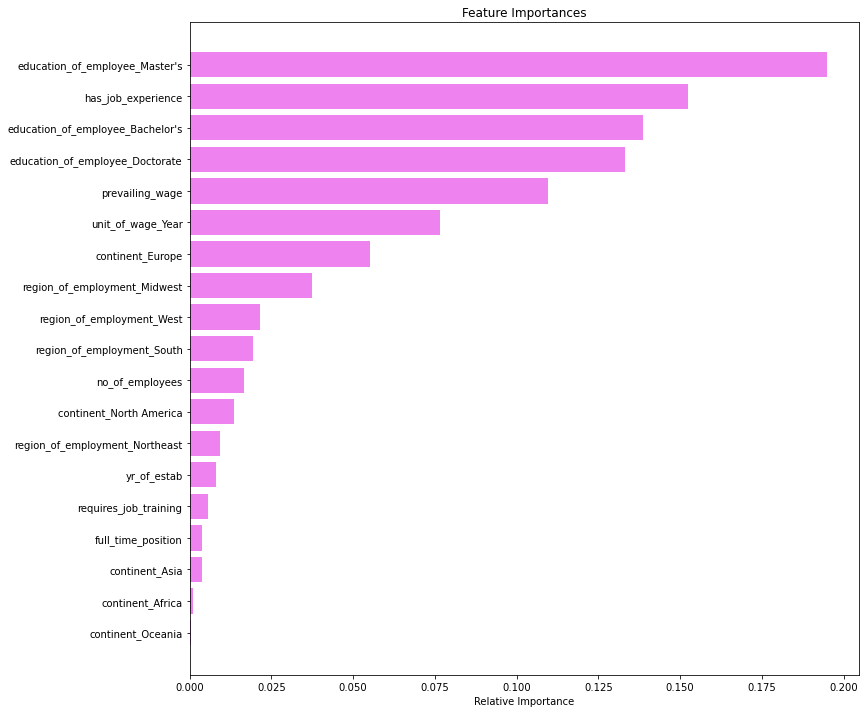

<IPython.core.display.Javascript object>

In [137]:
# level of importance of the predictor variables
importances = gbc_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Building the XGBoost Classifier Model

Training performance:
    Accuracy    Recall  Precision        F1
0  0.835336  0.924286   0.844064  0.882355


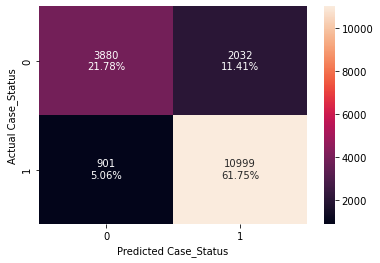

<IPython.core.display.Javascript object>

In [138]:
# Fitting the model
xgb_classifier = XGBClassifier(random_state=1, eval_metric="logloss")
xgb_classifier.fit(X_train, y_train)

# Calculating different metrics for the train dataset
xgb_classifier_model_train_perf = model_performance_classification_sklearn(
    xgb_classifier, X_train, y_train
)
print("Training performance:\n", xgb_classifier_model_train_perf)

# Creating confusion matrix for the train dataset
confusion_matrix_sklearn(xgb_classifier, X_train, y_train)


Testing performance:
    Accuracy    Recall  Precision       F1
0   0.73019  0.854538   0.767835  0.80887


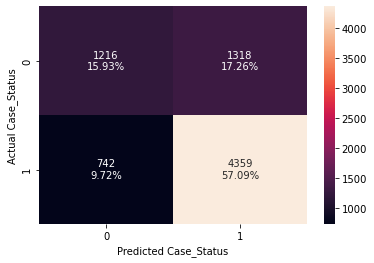

<IPython.core.display.Javascript object>

In [139]:
# Calculating different metrics for test dataset
xgb_classifier_model_test_perf = model_performance_classification_sklearn(
    xgb_classifier, X_test, y_test
)
print("Testing performance:\n", xgb_classifier_model_test_perf)

# Creating confusion matrix for the test dataset
confusion_matrix_sklearn(xgb_classifier, X_test, y_test)

* The XGboost model is not overfitting the training data and the F1 score is good
* The F1-score on the test data is 0.8089 which is close to that on the training data which is 0.8824
* Nevertheless, we'll see if we can get the model to perform better by tuning it.

### Hyperparameter Tuning of the XGBoost model

In [140]:
# Choose the type of classifier.
xgb_tuned = XGBClassifier(random_state=1, eval_metric="logloss")

# Grid of parameters to choose from
parameters = {
    "n_estimators": [10, 30, 50],
    "scale_pos_weight": [1, 2, 5],
    "subsample": [0.7, 0.9, 1],
    "learning_rate": [0.05, 0.1, 0.2],
    "colsample_bytree": [0.7, 0.9, 1],
    "colsample_bylevel": [0.5, 0.7, 1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.5, colsample_bynode=None, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', feature_types=None, gamma=None,
              gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=50, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=1, ...)

<IPython.core.display.Javascript object>

Training performance:
    Accuracy    Recall  Precision       F1
0  0.758927  0.872941   0.788762  0.82872


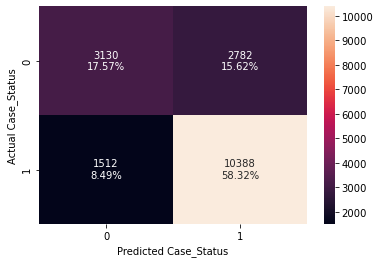

<IPython.core.display.Javascript object>

In [141]:
# Calculating different metrics for the Train dataset
xgb_tuned_model_train_perf = model_performance_classification_sklearn(
    xgb_tuned, X_train, y_train
)
print("Training performance:\n", xgb_tuned_model_train_perf)

# Creating confusion matrix for the test dataset
confusion_matrix_sklearn(xgb_tuned, X_train, y_train)

Testing performance:
    Accuracy    Recall  Precision        F1
0  0.751146  0.865321   0.784432  0.822893


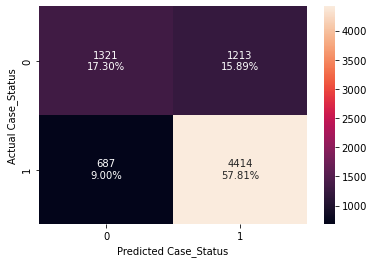

<IPython.core.display.Javascript object>

In [142]:
# Calculating different metrics for the test dataset
xgb_tuned_model_test_perf = model_performance_classification_sklearn(
    xgb_tuned, X_test, y_test
)
print("Testing performance:\n", xgb_tuned_model_test_perf)

# Creating confusion matrix for the test dataset
confusion_matrix_sklearn(xgb_tuned, X_test, y_test)

## Observation
* The tuned XGboost model is not overfitting the dataset
* The overall performance is better than that of the default XGboost model
* F1 Score, which is our metric of importance has improved from 0.8089 to 0.8229
* The F1 score for both training and test dataset is 0.8287 and 0.8229 respectively

In [143]:
# Printing the Gini importance of the predictor variables
print(
    pd.DataFrame(
        xgb_tuned.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                       Imp
education_of_employee_Bachelor's  0.179799
education_of_employee_Master's    0.159254
unit_of_wage_Year                 0.134791
education_of_employee_Doctorate   0.127974
has_job_experience                0.111028
continent_Europe                  0.046942
region_of_employment_Midwest      0.042087
full_time_position                0.025381
continent_North America           0.024793
region_of_employment_South        0.023971
region_of_employment_Northeast    0.023607
region_of_employment_West         0.021641
prevailing_wage                   0.019236
continent_Asia                    0.015528
requires_job_training             0.012296
continent_Africa                  0.011210
no_of_employees                   0.008422
yr_of_estab                       0.007243
continent_Oceania                 0.004798


<IPython.core.display.Javascript object>

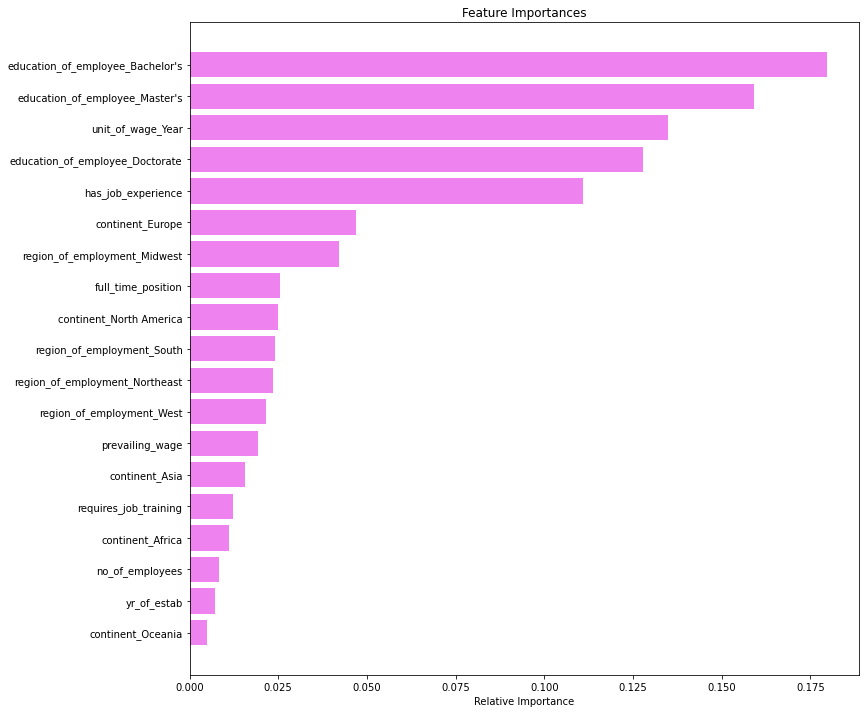

<IPython.core.display.Javascript object>

In [144]:
# level of importance of the predictor variables
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Building the Stacking Model

In [145]:
estimators = [
    ("Random Forest", rf_tuned),
    ("Gradient Boosting", gbc_tuned),
    ("Decision Tree", dtree_estimator),
]

final_estimator = xgb_tuned

stacking_classifier = StackingClassifier(
    estimators=estimators, final_estimator=final_estimator
)

stacking_classifier.fit(X_train, y_train)

StackingClassifier(estimators=[('Random Forest',
                                RandomForestClassifier(class_weight={0: 0.67,
                                                                     1: 0.33},
                                                       max_depth=25,
                                                       max_features='sqrt',
                                                       n_estimators=90,
                                                       oob_score=True,
                                                       random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           max_features=0.7,
                                                           random_state=1,
                                                           subsample=1)),
                               ('Decision Tree',
     

<IPython.core.display.Javascript object>

Training performance:
    Accuracy    Recall  Precision        F1
0  0.795363  0.925042   0.799942  0.857956


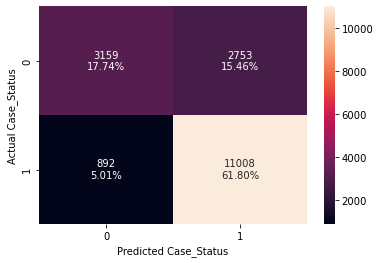

<IPython.core.display.Javascript object>

In [146]:
#Calculating different metrics for the train dataset
stacking_classifier_model_train_perf=model_performance_classification_sklearn(stacking_classifier,X_train,y_train)
print("Training performance:\n",stacking_classifier_model_train_perf)

#Creating confusion matrix for thr train dataset
confusion_matrix_sklearn(stacking_classifier,X_train,y_train)


Testing performance:
    Accuracy    Recall  Precision        F1
0  0.743811  0.858459   0.780153  0.817435


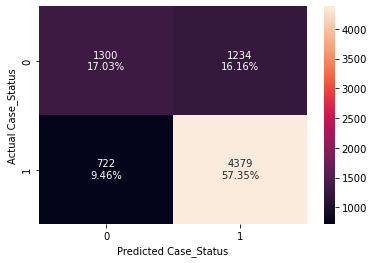

<IPython.core.display.Javascript object>

In [147]:
# Calculating different metrics for the test dataset
stacking_classifier_model_test_perf = model_performance_classification_sklearn(
    stacking_classifier, X_test, y_test
)
print("Testing performance:\n", stacking_classifier_model_test_perf)

# Creating confusion matrix for the test dataset
confusion_matrix_sklearn(stacking_classifier, X_test, y_test)

### Observation
* The stacking model is not overfitting the dataset
* The overall performance is not better than that of some of the earlier models we've seen
* The F1 score for both training and test dataset is 0.8580 and 0.8174 respectively

## Model Performance Comparison and Conclusions

In [148]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        d_tree_model_train_perf.T,
        dtree_estimator_model_train_perf.T,
        rf_estimator_model_train_perf.T,
        rf_tuned_model_train_perf.T,
        bagging_classifier_model_train_perf.T,
        bagging_estimator_tuned_model_train_perf.T,
        ab_classifier_model_train_perf.T,
        abc_tuned_model_train_perf.T,
        gb_classifier_model_train_perf.T,
        gbc_tuned_model_train_perf.T,
        xgb_classifier_model_train_perf.T,
        xgb_tuned_model_train_perf.T,
        stacking_classifier_model_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Estimator",
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Bagging Classifier",
    "Bagging Estimator Tuned",
    "Adaboost Classifier",
    "Adabosst Classifier Tuned",
    "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Decision Tree Estimator,Random Forest Estimator,Random Forest Tuned,Bagging Classifier,Bagging Estimator Tuned,Adaboost Classifier,Adabosst Classifier Tuned,Gradient Boost Classifier,Gradient Boost Classifier Tuned,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,1.0,0.738210,1.0,0.998372,0.984393,0.992365,0.737368,0.743038,0.752414,0.752133,0.835336,0.758927,0.795363
Recall,1.0,0.831429,1.0,0.999244,0.984874,0.998487,0.889664,0.890420,0.868403,0.870000,0.924286,0.872941,0.925042
Precision,1.0,0.788304,1.0,0.998321,0.991708,0.990167,0.758816,0.764006,0.784186,0.783072,0.844064,0.788762,0.799942
F1,1.0,0.809292,1.0,0.998782,0.988279,0.994310,0.819047,0.822383,0.824149,0.824251,0.882355,0.828720,0.857956


<IPython.core.display.Javascript object>

In [149]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        d_tree_model_test_perf.T,
        dtree_estimator_model_test_perf.T,
        rf_estimator_model_test_perf.T,
        rf_tuned_model_test_perf.T,
        bagging_classifier_model_test_perf.T,
        bagging_estimator_tuned_model_test_perf.T,
        ab_classifier_model_test_perf.T,
        abc_tuned_model_test_perf.T,
        gb_classifier_model_test_perf.T,
        gbc_tuned_model_test_perf.T,
        xgb_classifier_model_test_perf.T,
        xgb_tuned_model_test_perf.T,
        stacking_classifier_model_test_perf.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Estimator",
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Bagging Classifier",
    "Bagging Estimator Tuned",
    "Adaboost Classifier",
    "Adabosst Classifier Tuned",
    "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",
]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree,Decision Tree Estimator,Random Forest Estimator,Random Forest Tuned,Bagging Classifier,Bagging Estimator Tuned,Adaboost Classifier,Adabosst Classifier Tuned,Gradient Boost Classifier,Gradient Boost Classifier Tuned,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,0.653438,0.735691,0.716699,0.719712,0.694695,0.725475,0.733988,0.740537,0.744597,0.746693,0.730190,0.751146,0.743811
Recall,0.732013,0.823760,0.832190,0.835915,0.770633,0.878847,0.880220,0.882376,0.857087,0.861400,0.854538,0.865321,0.858459
Precision,0.744863,0.789701,0.764589,0.765942,0.771995,0.752055,0.759729,0.765216,0.781691,0.781711,0.767835,0.784432,0.780153
F1,0.738382,0.806371,0.796959,0.799400,0.771314,0.810523,0.815548,0.819630,0.817655,0.819623,0.808870,0.822893,0.817435


<IPython.core.display.Javascript object>

### Observation
* All the bagging classifiers overfits on the training data with the exception of the tuned Decision Tree (Deciscion Tree Estimator).
* None of the Boosting classifiers seem to overfit the training dataset
* The tuned XGBoost Classifier gives the best F1-score of 0.8229 on the test data and is not overfitting the dataset
* Both the Tuned Adaboost Classifier the Tuned Gradient boost Classifier are second with F1_scores of 0.8196 and they dont overfit the dataset
* the default gradient boost Classifier has an F1-Score of 0.8177 and it does not overfit the dataset. 
* The Tuned XGBoost classifier is the best amongst all the classifiers tried and therefore could be used to build our model, but for simplicity and ease of implementation, the gradient boost classifier will also suffice.

## Actionable Insights and Recommendations

### Insights

1. Majority of the Visa applicants (About 66%) came from asia, while 14.6% and 12.9% came from Europe and North America respectively. The remaining (about 6.3%) came from South America, Africa and Oceania.
The continent that a work visa applicant came from has a part to play in whether their application is certified or not. Applicants from Europe has a visa approval rate of 80%. This is followed by Africa with a visa approval rate of 72%. South America has the lowest approval rate of 58%. 
    
2. More than 75% of the applicants for work Visa have a Masters (37.8%) or a Bachelor's (40.2%) degree. 8.6% has Doctororate degrees while the remaining 13.4% are High school graduates.
The higher the academic qualification of an applicant, the higher is the chance of their application for work visa being certified. Applicants with Doctorate degrees have an 87% chance of their application being approved while applicants with Master's and bachelor's degree have visa certification rates of 78% and 62% respectively. High School graduates have the lowest visa approval rate of about 34% . 

3. About 58% of the Applicants have prior work experience while the rest have no experience whatsoever. Applicants with prior job experience have a higher probability of their visa application being approved (almost 75%) wheras aplicants with no prior work experience has an approval rate of 56%.

4. Over 80% of the employees are in the Northeast (28.3%), South (27.5%) and West (25.8%) regions while the Midwest region caters for 16.9% of the employees. The Island region caters for a paltry 1.5%. Approval rates for applicants wishing to work in the midwest region is the highest (about 76%), followed by those heading to to the South region (70%). The Island region have the lowest approval rate (60%)

5.  About 91.5% of the employees are on annual salaries and 8.5% are on hourly wages. Applicants on annual salaries  have a 70% chance of their application being cerified, whereas those with wages paid on an hourly basis have an approval rate of 35%.

6.  88.4% of the applicants for work visa do not require job training wheras 11.6% require job training. There is almost no difference in the approval or rejection rate for applicants requiring job training and those that dont.

7. 89.4% of the jobs on offer are full time positions while 10.6% are part time. The approval rate does not differ significantly whether an applicant is taking up a Full-time or part_time position.

8. 66.8% of visa applications are certified while 33.2% are denied.


### Recommendations

1. The Tuned XGBoost classifier with an F1_score of 0.8229 is the best amongst all the classifiers tried and therefore could be used to build our model, but for simplicity and ease of implementation, the gradient boost classifier will also suffice. It has an F1_score of 0.8177 and its Feature importance scores aligns more with the findings in our EDA than the Tuned XGboost model. For example, the tuned XGBoost classifier gives having a Doctorate degree a feature importance score of 0.127974, a Master's degree a feature importance of 0.159254 and a bachelor's degree a feature importance of 0.179799. Whereas, the gradient Boost model gives having a Doctorate degree a feature importance score of 0.206243, a Master's degree has a feature importance score of 0.174033 and a Bachelor's degree a feature importance of 0.080336. The Gradient Boost model's feature importance score is more in alignment with the findings in our EDA where we are told that Doctorate degree holders have an 87% chance of their Visa application being approved while Master's degree holders have a Visa approval rate of 78% and bachelor's degree holders have approval rates of 62%. We shall therefore be building our model based on the Gradient Boost classifier.


2. The top six determinants (according to the Gradient Boost Classifier) of whether a work Visa will be approved or not are: Education, Job experience, Unit of wage, prevailing wage, Continent and Region of employment.

   A. Suitable profile of applicants for whom visa should be certified are:
    * Possession of a Doctorate or Master's degree
    * Has prior work experience
    * Wage payment for position on offer is Annual
    * Prevailing wage for position on offer is high, which connotes experience and expertise
    * Continent of origin is Europe preferably
    * Position on offer is in the Midwest
    
   B. Profile of applicants for whom visa should be denied are:
    * Does not possess a University degree
    * Has no prior work experience
    * The unit of wage payment for position on offer is "Hour"
    * Prevailing wage for position on offer is low
    * Continent of origin is probably Oceania, Africa or Asia
    * Position on offer is in the Island region, 
    

3. Other important features such as Age, Marital status and the applicant's Area of Expertise should be incorporated into the classification model to be developed in future.